In [1]:
# IMPORT YOUR LIBRARIES HERE

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from tqdm.notebook import tqdm

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV, Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

/Users/mivelikikh/software/miniconda3/envs/dss/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Assignment 1 

Welcome to the assignment! 

You will have to implement regression and classification algorithms, applying these methods to the topics of agriculture, food, water, and health. More precisely, you will try to:
- predict crop yields using data on weather and fertilizer use;
- predict the potability of water using data on the mineral and micro-organisms content of water.

Once you are done you have to submit your notebook here: 
[https://moodle.epfl.ch/mod/assign/view.php?id=1244180](https://moodle.epfl.ch/mod/assign/view.php?id=1244180)

If there is need for further clarifications on the questions, after the assignment is released, we will update this file, so make sure you check the git repository for updates.

Good luck!

## Linear regression: predicting crop yields

In 2020, between 720 million and 811 million persons worldwide were suffering from hunger (see [SDG Goal 2](https://www.un.org/sustainabledevelopment/hunger/) Zero Hunger). Given the ongoing growth of the world population, it is imperative to comprehend crop yield at a global level in order to tackle food security issues and mitigate the effects of climate change.

The Agricultural yield depends on weather conditions (rain, temperature, etc) and fertilizers use. Having precise information regarding the historical crop yield is critical for making informed decisions regarding agricultural risk management and future projections.

Some E4S publications on the topic of food:
- [Threats to Nitrogen Fertilizer, Opportunities to Cultivate Sustainable Practices?](https://e4s.center/resources/reports/threats-to-nitrogen-fertilizer-opportunities-to-cultivate-sustainable-practices/)
- [True cost of food as a lever to transform the Swiss food system](https://e4s.center/resources/reports/true-cost-of-food-as-a-lever-to-transform-the-swiss-food-system/)

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Sustainable_Development_Goal_02ZeroHunger.svg/800px-Sustainable_Development_Goal_02ZeroHunger.svg.png' width="200">

We will use data obtained from the [FAO](http://www.fao.org/home/en/) (Food and Agriculture Organization) and [World Data Bank](https://data.worldbank.org/), and gathered in the [Crop Yield Prediction Dataset](https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset).

Our goal is to predict the crop yields using the temperature, rain fall, and type of crops.


### Question 1: Load and Discover the dataset

- Load the data in a dataframe. The url link is provided below. Display the first 10 observations and the types of data **1 point**

In [2]:
url_yield = 'https://raw.githubusercontent.com/michalis0/MGT-502-Data-Science-and-Machine-Learning/main/data/yield_df.csv'

# YOUR CODE HERE

yield_df = pd.read_csv(url_yield)

print("The first 10 observations of the `yield_df` are the following:")
display(yield_df.head(10))

print("The types of the `yield_df` features are the following:")
yield_df.dtypes

The first 10 observations of the `yield_df` are the following:


Area         Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0  Albania        Maize  1990        36613                           1485   
1  Albania     Potatoes  1990        66667                           1485   
2  Albania  Rice, paddy  1990        23333                           1485   
3  Albania      Sorghum  1990        12500                           1485   
4  Albania     Soybeans  1990         7000                           1485   
5  Albania        Wheat  1990        30197                           1485   
6  Albania        Maize  1991        29068                           1485   
7  Albania     Potatoes  1991        77818                           1485   
8  Albania  Rice, paddy  1991        28538                           1485   
9  Albania      Sorghum  1991         6667                           1485   

   pesticides_tonnes  avg_temp  
0              121.0     16.37  
1              121.0     16.37  
2              121.0     16.37  
3              121.0     16.37  
4              121.0     16.37  
5              121.0     16.37  
6              121.0     15.36  
7              121.0     15.36  
8              121.0     15.36  
9              121.0     15.36

The types of the `yield_df` features are the following:


Area                              object
Item                              object
Year                               int64
hg/ha_yield                        int64
average_rain_fall_mm_per_year      int64
pesticides_tonnes                float64
avg_temp                         float64
dtype: object

- Print the list of countries ('Area') and years available in the dataset **1 point**

In [3]:
# YOUR CODE HERE

yield_countries = list(yield_df.Area.unique())
yield_years = list(yield_df.Year.unique())

<span style="color:blue">The following countries are included in the dataset:</span>

In [4]:
display(yield_countries)

print(f"{len(yield_countries)} countries included")

['Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chile',
 'Colombia',
 'Croatia',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eritrea',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'India',
 'Indonesia',
 'Iraq',
 'Ireland',
 'Italy',
 'Jamaica',
 'Japan',
 'Kazakhstan',
 'Kenya',
 'Latvia',
 'Lebanon',
 'Lesotho',
 'Libya',
 'Lithuania',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Mali',
 'Mauritania',
 'Mauritius',
 'Mexico',
 'Montenegro',
 'Morocco',
 'Mozambique',
 'Namibia',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Nicaragua',
 'Niger',
 'Norway',
 'Pakistan',
 'Papua New Guinea',
 'Peru',
 'Poland',
 'Portugal',
 'Qatar',


101 countries included


<span style="color:blue">Apparently, we will work with a data from around the world, as it 101 country presented in the dataset</span>

<span style="color:blue">The data covers the timeline from 1990 to 2013:</span>

In [5]:
yield_years

[1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013]

- Print the list of 'Item' in the dataset. You should obtain a list of 10 crops, which are among the most consumed in the world **1 point**

In [6]:
# YOUR CODE HERE

yield_items = list(yield_df.Item.unique())
yield_items

['Maize',
 'Potatoes',
 'Rice, paddy',
 'Sorghum',
 'Soybeans',
 'Wheat',
 'Cassava',
 'Sweet potatoes',
 'Plantains and others',
 'Yams']

- Display summary statistics for the columns: 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes','avg_temp'. How many observations do we have? **1 point**

*Hint:* You can extract the columns 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes','avg_temp' in a new dataframe since we will reuse it in the following questions

In [7]:
# YOUR CODE HERE

yield_features = ['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes','avg_temp']
yields_sample = yield_df[yield_features]
yields_sample.describe()

hg/ha_yield  average_rain_fall_mm_per_year  pesticides_tonnes  \
count   28242.000000                    28242.00000       28242.000000   
mean    77053.332094                     1149.05598       37076.909344   
std     84956.612897                      709.81215       59958.784665   
min        50.000000                       51.00000           0.040000   
25%     19919.250000                      593.00000        1702.000000   
50%     38295.000000                     1083.00000       17529.440000   
75%    104676.750000                     1668.00000       48687.880000   
max    501412.000000                     3240.00000      367778.000000   

           avg_temp  
count  28242.000000  
mean      20.542627  
std        6.312051  
min        1.300000  
25%       16.702500  
50%       21.510000  
75%       26.000000  
max       30.650000

- Display a heatmap of the correlation matrix between the columns: 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes','avg_temp' **1 point**

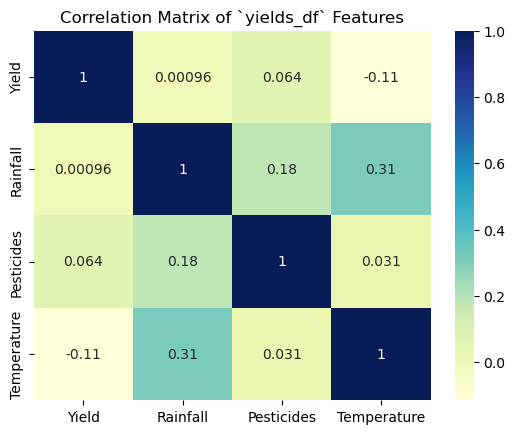

In [8]:
# YOUR CODE HERE

yields_sample = yields_sample.rename(columns={'hg/ha_yield': 'Yield',
                                              'average_rain_fall_mm_per_year': 'Rainfall', 
                                              'pesticides_tonnes': 'Pesticides', 
                                              'avg_temp': 'Temperature'})

yields_sample_corr_matrix = yields_sample.corr()
ax = sns.heatmap(yields_sample_corr_matrix, cmap='YlGnBu', annot=True)
ax.set_title('Correlation Matrix of `yields_df` Features')
plt.show()

- Create a boxplot of the columns: 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes','avg_temp' **1 point**

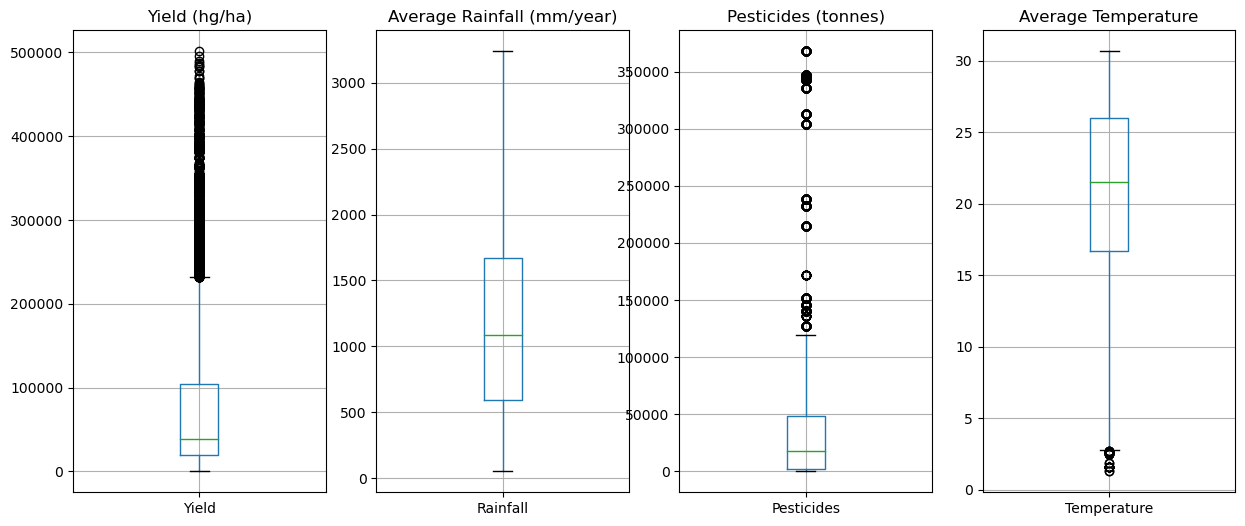

In [9]:
# YOUR CODE HERE

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 6))
yields_sample[['Yield']].boxplot(ax=axes[0])
yields_sample[['Rainfall']].boxplot(ax=axes[1])
yields_sample[['Pesticides']].boxplot(ax=axes[2])
yields_sample[['Temperature']].boxplot(ax=axes[3])

axes[0].set_title('Yield (hg/ha)')
axes[1].set_title('Average Rainfall (mm/year)')
axes[2].set_title('Pesticides (tonnes)')
axes[3].set_title('Average Temperature')

plt.show()

### <span style="color:blue">Comments:</span>
1. <span style="color:blue">**Yield (hg/ha):** Location the box indicates that the spread of the middle 50% of the data is in lower values (up to ±100k hg/ha). At the same time, we can observe a lot of outliers (black dots) in the upper part of the plot.</span>
2. <span style="color:blue">**Average Rainfall (mm/year):** The first observation - the lack of outliers. The box is pretty big, indicating that the middle 50% of data points is well enough distributed. No "dry days" are in the data sample: the minimal value is not zero.</span>
3. <span style="color:blue">**Pesticides (tones):** There are some crops without pesticides (the minimal value is zero). There are a lot of outliers above ±120k tonnes (the max value).</span>
4. <span style="color:blue">**Average Temperature:** For the middle 50% of data points we could day that the temperature was in range from ±17 to ±26 degrees. Some yields, apparently, experienced extraodinary cold times or simply located in nordic regions (i.e. Scandinavian countries): temperature was below ±3 degrees but not negative.</span>

- Create a pairplot of the columns: 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes','avg_temp' **1 point**

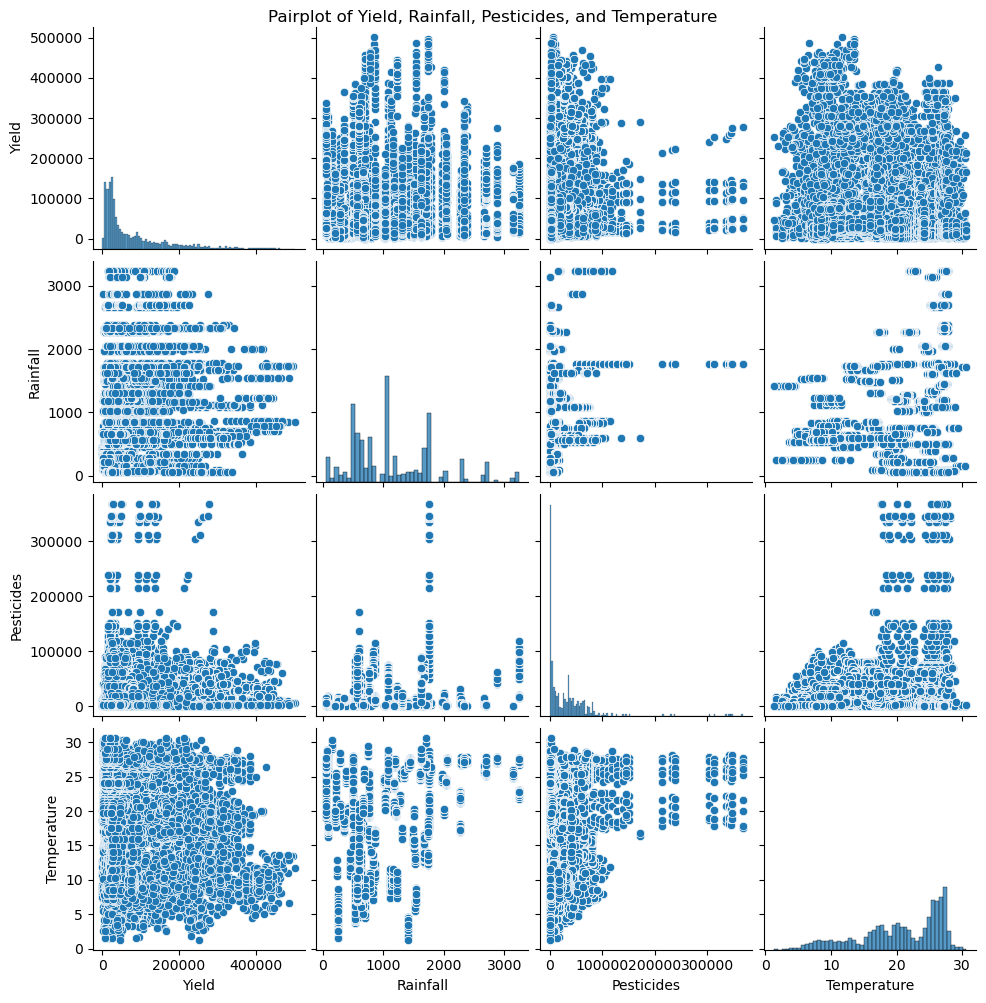

In [10]:
# YOUR CODE HERE

sns.pairplot(yields_sample)

plt.suptitle('Pairplot of Yield, Rainfall, Pesticides, and Temperature', y=1.0)
plt.show()

- Feel free to pursue your exploration to better understand your dataset. Although not graded, this might help you better understanding the problem and answer the following questions.

<span style="color:blue">I want to plot histograms separately from the pairplot and to calculate the skewness of each feature.</span>

In [11]:
# YOUR CODE HERE

def calculate_skewness(dataset):
    skewness = []
    
    for column in dataset.columns:
        skewness.append(round(stats.skew(dataset[column]), 3))
    return skewness

yields_skewness = calculate_skewness(yields_sample)

Skewness of Yield (hg/ha): 1.793
Skewness of Average Rainfall (mm/year): 0.854
Skewness of Pesticides (tonnes): 3.49
Skewness of Average Temperature: -0.742


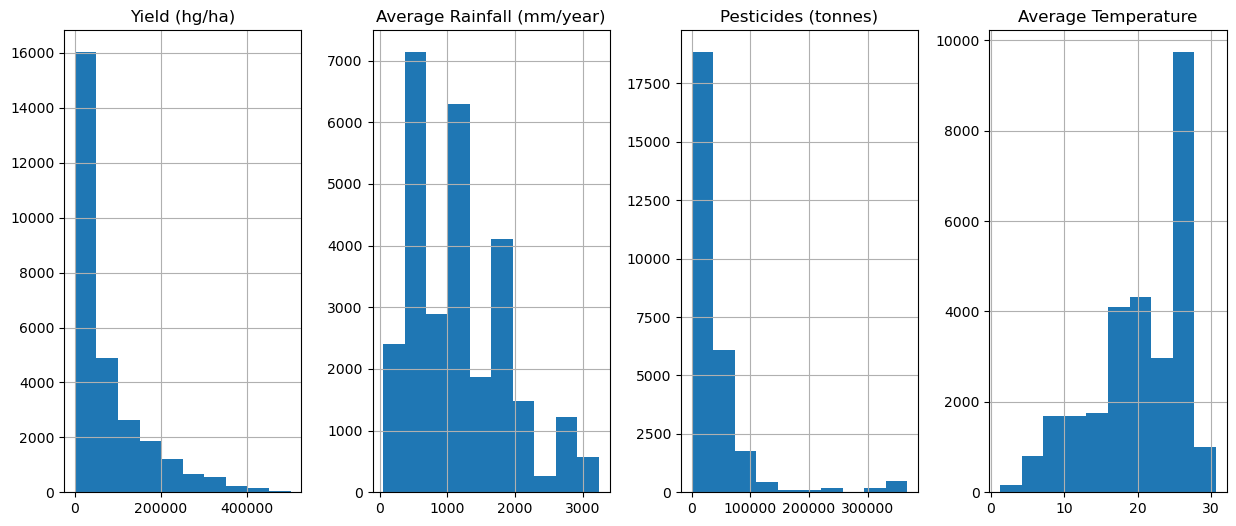

In [12]:
print(f"Skewness of Yield (hg/ha): {yields_skewness[0]}")
print(f"Skewness of Average Rainfall (mm/year): {yields_skewness[1]}")
print(f"Skewness of Pesticides (tonnes): {yields_skewness[2]}")
print(f"Skewness of Average Temperature: {yields_skewness[3]}")

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 6))
yields_sample[['Yield']].hist(ax=axes[0])
yields_sample[['Rainfall']].hist(ax=axes[1])
yields_sample[['Pesticides']].hist(ax=axes[2])
yields_sample[['Temperature']].hist(ax=axes[3])

axes[0].set_title('Yield (hg/ha)')
axes[1].set_title('Average Rainfall (mm/year)')
axes[2].set_title('Pesticides (tonnes)')
axes[3].set_title('Average Temperature')

plt.show()

<span style="color:blue">It seems that features are notably skewed. I don't observe any normally distributes features. The closest ones are average temperature (skewed to the left: -0.742) and average rainfall (skewed to the right: 0.854), but there are still some data points spike. This fact might have an effect on the following model performance. Traditionally, to tackle this issue we need to log-transform the data. However, in the context of this assignment I will try to tackle it with another strategy: rescalling features with `StandardScaler` (more information is in the upcoming questions).</span>

### Question 2: Multivariate regression 

We will try to predict the crop yields (column 'hg/ha_yield') using as features: 'Item', 'average_rain_fall_mm_per_year', 'pesticides_tonnes','avg_temp'

- Extract your features and outcome **1 point**

In [13]:
# YOUR CODE HERE

features = ['Item', 'average_rain_fall_mm_per_year', 'pesticides_tonnes','avg_temp']
X = yield_df[features]
y = yield_df['hg/ha_yield']

- Split between training and test set **1 point**

*Note*: Use as option: `test_size=0.2`, `random_state=42`, `shuffle=True`

In [14]:
# YOUR CODE HERE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

- Encode the column 'Item' using `LabelEncoder` **1 point**

*Note*: After training your encoder, you need to transform the values of both the training and test set

In [15]:
# YOUR CODE HERE

item_train = X_train[['Item']].values.ravel()
item_test = X_test[['Item']].values.ravel()

label_encoder = LabelEncoder()
label_encoder.fit(item_train)

X_train = X_train.assign(Item=label_encoder.transform(item_train))
X_test = X_test.assign(Item=label_encoder.transform(item_test))

- Rescale your features using `MinMaxScaler` **1 point**

<span style="color:blue">Based on the boxplots above, I could see that some of the features (especially, 'Yield (hg/ha)' and 'Pesticides (tonnes)') have anomalies. After plotting histograms with features' distributions, I could see that some of the features are skewed. Based on these observations, I think that in this task it might be reasonable enough to work with `StandardScaler` rather `MinMaxScaler`., especially considering the following facts:</span>
1. <span style="color:blue">**Many ML estimators might behave badly if the individual features do not (more or less) look like standard normally distributed data** (e.g. Gaussian with 0 mean and unit variance).</span>
2. <span style="color:blue">In this regard, **`StandardScaler` is less sensitive to outliers**, because it works with the mean of 0 and the standard deviation of a unit, while `MinMaxScaler` operates based on minimum and maximum values of the data, which can be problematic if there are outliers present.</span>

<span style="color:blue">More information about `StandardScaler` is [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)</span>

<span style="color:blue">But let's see how performative are both scalling approaches:</span>

In [16]:
# YOUR CODE HERE

std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std_scaled = std_scaler.transform(X_train)
X_test_std_scaled = std_scaler.transform(X_test)

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X_train)
X_train_minmax_scaled = minmax_scaler.transform(X_train)
X_test_minmax_scaled = minmax_scaler.transform(X_test)

- Build and train a multivariate linear regression model **1 point**

In [17]:
# YOUR CODE HERE

lin_reg_std = LinearRegression()
lin_reg_std.fit(X_train_std_scaled, y_train)

lin_reg_minmax = LinearRegression()
lin_reg_minmax.fit(X_train_minmax_scaled, y_train)

multi_lin_reg_comparison = pd.DataFrame({'StandardScaler': lin_reg_std.coef_.flatten(), 'MinMaxScaler': lin_reg_minmax.coef_.flatten()},
                                        index=['Item', 'Average Rainfall (mm/year)', 'Pesticides (tonnes)', 'Average Temperature'])

multi_lin_reg_comparison

StandardScaler  MinMaxScaler
Item                         -20306.829688 -69276.620729
Average Rainfall (mm/year)     1661.432350   7491.197926
Pesticides (tonnes)            6420.646995  39324.711491
Average Temperature          -11700.069047 -54159.849248

<span style="color:blue">Indeed, different scalling approaches provide different coefficients that show relative importance of the features' relative. Although the pattern is the same (in both scalling methods coefficients are either positive or negative), it is obviously that the magnitude of `MinMaxScaler` results is much higher in terms of the absolute value. To me, this is not a good sign: coefficients represent the change in the target variable that is associated with a one-unit change in the corresponding feature, while holding all other features constant.</span>

- What is the $R^2$, mean absolute error, and mean square error on the training set? On the test set? What do you think? **1 point**

In [18]:
# YOUR CODE HERE

# train set
predictions_train_std = lin_reg_std.predict(X_train_std_scaled)

mae_train_std = round(mean_absolute_error(y_train, predictions_train_std), 3)
mse_train_std = round(mean_squared_error(y_train, predictions_train_std), 3)
r2_train_std = round(r2_score(y_train, predictions_train_std), 3)

predictions_train_minmax = lin_reg_minmax.predict(X_train_minmax_scaled)

mae_train_minmax = round(mean_absolute_error(y_train, predictions_train_minmax), 3)
mse_train_minmax = round(mean_squared_error(y_train, predictions_train_minmax), 3)
r2_train_minmax = round(r2_score(y_train, predictions_train_minmax), 3)

# test set
predictions_test_std = lin_reg_std.predict(X_test_std_scaled)

mae_test_std = round(mean_absolute_error(y_test, predictions_test_std), 3)
mse_test_std = round(mean_squared_error(y_test, predictions_test_std), 3)
r2_test_std = round(r2_score(y_test, predictions_test_std), 3)

predictions_test_minmax = lin_reg_minmax.predict(X_test_minmax_scaled)

mae_test_minmax = round(mean_absolute_error(y_test, predictions_test_minmax), 3)
mse_test_minmax = round(mean_squared_error(y_test, predictions_test_minmax), 3)
r2_test_minmax = round(r2_score(y_test, predictions_test_minmax), 3)

# combining results in one frame
metrics_std = pd.DataFrame({'train': [mae_train_std, mse_train_std, r2_train_std],
                            'test': [mae_test_std, mse_test_std, r2_test_std]},
                            index=['MAE', 'MSE', 'R2'])

metrics_std.columns.name = 'StandardScaler'

metrics_minmax = pd.DataFrame({'train': [mae_train_minmax, mse_train_minmax, r2_train_minmax],
                               'test': [mae_test_minmax, mse_test_minmax, r2_test_minmax]},
                                index=['MAE', 'MSE', 'R2'])

metrics_minmax.columns.name = 'MinMaxScaler'

display(metrics_std)
display(metrics_minmax)

StandardScaler         train          test
MAE             6.218846e+04  6.244600e+04
MSE             6.672605e+09  6.695411e+09
R2              7.400000e-02  7.700000e-02

MinMaxScaler         train          test
MAE           6.218846e+04  6.244600e+04
MSE           6.672605e+09  6.695411e+09
R2            7.400000e-02  7.700000e-02

<span style="color:blue">On this stage, the difference between two scalling approaches is zero.</span>

<span style="color:blue">The **MAE** values for both Scalers are exactly the same (for both the training and testing datasets). This indicates that the *average absolute difference* between the predicted and actual values of the target variable is the same for both scaling methods, which is an interesting finding.</span>

<span style="color:blue">The **MSE** values are also identical for both scaling methods.</span>

<span style="color:blue">The **$R^2$** values are also identical. However, the $R^2$ values are quite low: only 7.4% and 7.7% for train and test sets, respectively. It suggests that the model is not capturing a significant amount of variation in the target variable.</span>

### Question 3: Polynomial features regression

We will try to improve the quality of our prediction using `PolynomialFeatures`.

- Write a function that is using as inputs the degree of polynomial features (an integer), the training and test set (for your features and outcome), and return the $R^2$, mean absolute error, and mean square error on the training and on the set of a polynomial feature regression **3 points**

*Hint:* You do not need to include in your function the splitting, encoding and scaling since we will reuse the ones set created before (as before). Your function should transform your training and test set to integrate polynomial features, then build and train your model, before calculating the various error metrics.

In [19]:
# YOUR CODE HERE

def poly_reg(degree, X_train, y_train, X_test, y_test, scaler_used):
    """
    Computes the statistics: MAE, MSE, and R^2 on the training 
    and test sets of a polynomial feature regression model.

    Args:
    degree: degree of polynomial features (integer)
    X_train: training set features
    y_train: training set target variable
    X_test: test set features
    y_test: test set target variable
    scaler_used: scaling approach used before (string)

    Returns:
    Dataframe with MAE, MSE, R2 on the training and test sets.
    """

    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_poly, y_train)

    y_train_pred = lin_reg.predict(X_train_poly)
    y_test_pred = lin_reg.predict(X_test_poly)
    
    # metrics: train set
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # metrics: test set
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # metrics dataframe
    poly_metrics = pd.DataFrame({'train': [mae_train, mse_train, r2_train],
                                 'test': [mae_test, mse_test, r2_test]},
                                 index=['MAE', 'MSE', 'R2'])
    
    poly_metrics.columns.name = scaler_used
    
    return poly_metrics

- What are the the $R^2$, mean absolute error, and mean square error on the training and on the set of a polynomial features regression with degree = 3? With degree = 7? **1 point**

<span style="color:blue">With a degree = 3:</span>

In [20]:
# YOUR CODE HERE

display(poly_reg(3, X_train_std_scaled, y_train, X_test_std_scaled, y_test, "StandardScaler"))
display(poly_reg(3, X_train_minmax_scaled, y_train, X_test_minmax_scaled, y_test, "MinMaxScaler"))

StandardScaler         train          test
MAE             5.725729e+04  5.723077e+04
MSE             5.649954e+09  5.640627e+09
R2              2.161871e-01  2.223764e-01

MinMaxScaler         train          test
MAE           5.725729e+04  5.723077e+04
MSE           5.649954e+09  5.640627e+09
R2            2.161871e-01  2.223764e-01

<span style="color:blue">With a degree = 7:</span>

In [21]:
# YOUR CODE HERE

display(poly_reg(7, X_train_std_scaled, y_train, X_test_std_scaled, y_test, "StandardScaler"))
display(poly_reg(7, X_train_minmax_scaled, y_train, X_test_minmax_scaled, y_test, "MinMaxScaler"))

StandardScaler         train          test
MAE             2.825673e+04  2.896087e+04
MSE             1.508478e+09  1.554395e+09
R2              7.907302e-01  7.857093e-01

MinMaxScaler         train          test
MAE           2.825673e+04  2.896087e+04
MSE           1.508478e+09  1.554395e+09
R2            7.907302e-01  7.857093e-01

<span style="color:blue">Not surprisingly, with a higher degree of polynom I obtained more accurate results. With a degree = 3, for both Scalers, $R^2$ was 21.6% and 22.2% for the train and test sets, respectively. With a degree = 7, for both Scalers, $R^2$ was 79.1% and 78.6% for the train and test sets, respectively.</span>

<span style="color:blue">At the same time, MAE and MSE remarkably decreased.</span>

- Plot the evolution of the MSE on the training set for a polynomial feature regression model when the degree goes from 2 to 10. On the same figure, plot the MSE on the test set for a polynomial feature regression model, when the degree goes from 2 to 10. Which degree would you choose and why? **2 points**

  0%|          | 0/9 [00:00<?, ?it/s]

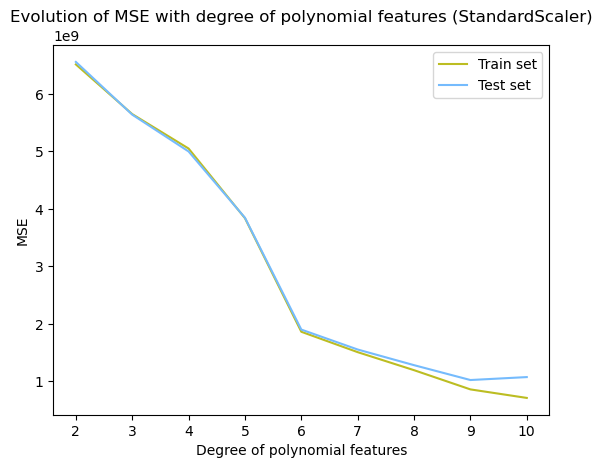

In [22]:
# YOUR CODE HERE

train_mse = []
test_mse = []

for degree in tqdm(range(2, 11)):
    poly_metrics = poly_reg(degree, X_train_std_scaled, y_train, X_test_std_scaled, y_test, "StandardScaler")
    train_mse.append(poly_metrics.loc['MSE', 'train'])
    test_mse.append(poly_metrics.loc['MSE', 'test'])

degrees = range(2, 11)
plt.plot(degrees, train_mse, label='Train set', color='tab:olive')
plt.plot(degrees, test_mse, label='Test set', color='xkcd:sky blue')
plt.xlabel('Degree of polynomial features')
plt.ylabel('MSE')
plt.title('Evolution of MSE with degree of polynomial features (StandardScaler)')
plt.legend()
plt.show()

  0%|          | 0/9 [00:00<?, ?it/s]

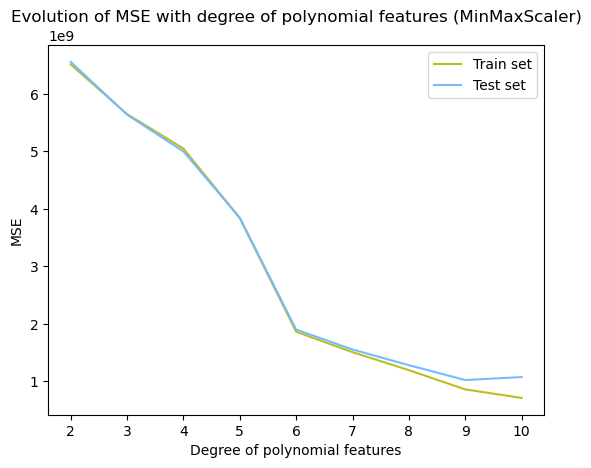

In [23]:
# YOUR CODE HERE

train_mse = []
test_mse = []

for degree in tqdm(range(2, 11)):
    poly_metrics = poly_reg(degree, X_train_minmax_scaled, y_train, X_test_minmax_scaled, y_test, "MinMaxScaler")
    train_mse.append(poly_metrics.loc['MSE', 'train'])
    test_mse.append(poly_metrics.loc['MSE', 'test'])

degrees = range(2, 11)
plt.plot(degrees, train_mse, label='Train set', color='tab:olive')
plt.plot(degrees, test_mse, label='Test set', color='xkcd:sky blue')
plt.xlabel('Degree of polynomial features')
plt.ylabel('MSE')
plt.title('Evolution of MSE with degree of polynomial features (MinMaxScaler)')
plt.legend()
plt.show()

<span style="color:blue">Typically, we want to choose the degree that provides the lowest MSE on the test set (blue line), as this indicates that the model generalizes well to new data. In this case, we should prefer 9 over other degrees as after this degree the model tends to overfit (since the error for the test set is increasing after).</span> 

In [24]:
# polynom without ridge and cross-validation
display(poly_reg(9, X_train_std_scaled, y_train, X_test_std_scaled, y_test, "StandardScaler"))
display(poly_reg(9, X_train_minmax_scaled, y_train, X_test_minmax_scaled, y_test, "MinMaxScaler"))

StandardScaler         train          test
MAE             1.869257e+04  1.984066e+04
MSE             8.605814e+08  1.023543e+09
R2              8.806123e-01  8.588931e-01

MinMaxScaler         train          test
MAE           1.869257e+04  1.984066e+04
MSE           8.605814e+08  1.023543e+09
R2            8.806123e-01  8.588931e-01

### Question 4: Ridge and cross-validation

- Build, train, and evaluate a polynomial features regression model, with Ridge regularization, and cross validation. For number of degree, select the one that you picked before. How does your new model compares to your previous one? **3 points**

In [25]:
def ridge_regression(degree, X_train, y_train, X_test, y_test, scaler_used, cross_validation=False):
    """
    Computes the statistics: MAE, MSE, R^2 on the train and test sets
    of a polynomial feature regression model with Ridge regularization and
    optional cross-validation.

    Args:
    degree: degree of polynomial features (integer)
    X_train: training set features
    y_train: training set target variable
    X_test: test set features
    y_test: test set target variable
    scaler_used: scaling approach used before (string)
    cross_validation: whether to perform cross-validation: default False (boolean)

    Returns:
    Dataframe with MAE, MSE, R2 on the training and test sets.
    """

    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    if cross_validation:
        ridge_model = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5, fit_intercept=False)
    else:
        ridge_model = Ridge(alpha=1.0, fit_intercept=False)

    ridge_model.fit(X_train_poly, y_train)

    # metrics: train set
    predictions_train = ridge_model.predict(X_train_poly)
    mae_train = mean_absolute_error(y_train, predictions_train)
    mse_train = mean_squared_error(y_train, predictions_train)
    r2_train = r2_score(y_train, predictions_train)

    # metrics: test set
    predictions_test = ridge_model.predict(X_test_poly)
    mae_test = mean_absolute_error(y_test, predictions_test)
    mse_test = mean_squared_error(y_test, predictions_test)
    r2_test = r2_score(y_test, predictions_test)
    
    # metrics dataframe
    if cross_validation:
        ridge_metrics = pd.DataFrame({'train': [mae_train, mse_train, r2_train],
                                      'test': [mae_test, mse_test, r2_test]},
                                      index=['MAE', 'MSE', 'R2'])
    else:
        ridge_metrics = pd.DataFrame({'train': [mae_train, mse_train, r2_train],
                                      'test': [mae_test, mse_test, r2_test]},
                                      index=['MAE', 'MSE', 'R2'])
    ridge_metrics.columns.name = scaler_used

    return ridge_metrics

In [26]:
# ridge without cross-validation
display(ridge_regression(9, X_train_std_scaled, y_train, X_test_std_scaled, y_test, "StandardScaler"))
display(ridge_regression(9, X_train_minmax_scaled, y_train, X_test_minmax_scaled, y_test, "MinMaxScaler"))

/Users/mivelikikh/software/miniconda3/envs/dss/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.02871e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


StandardScaler         train          test
MAE             1.982060e+04  2.080147e+04
MSE             9.411417e+08  1.027872e+09
R2              8.694363e-01  8.582963e-01

MinMaxScaler         train          test
MAE           5.526773e+04  5.495082e+04
MSE           5.315329e+09  5.276024e+09
R2            2.626093e-01  2.726410e-01

In [27]:
# ridge with cross-validation
display(ridge_regression(9, X_train_std_scaled, y_train, X_test_std_scaled, y_test, "StandardScaler", cross_validation=True))
display(ridge_regression(9, X_train_minmax_scaled, y_train, X_test_minmax_scaled, y_test, "MinMaxScaler", cross_validation=True))

/Users/mivelikikh/software/miniconda3/envs/dss/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.78872e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/mivelikikh/software/miniconda3/envs/dss/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.03865e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/mivelikikh/software/miniconda3/envs/dss/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.91055e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/mivelikikh/software/miniconda3/envs/dss/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.90902e-18): result may not be accurate.
  return lina

StandardScaler         train          test
MAE             1.982060e+04  2.080147e+04
MSE             9.411417e+08  1.027872e+09
R2              8.694363e-01  8.582963e-01

MinMaxScaler         train          test
MAE           5.159585e+04  5.110733e+04
MSE           4.639560e+09  4.590912e+09
R2            3.563581e-01  3.670914e-01

<span style="color:blue">Overall, it seems that in this particular case making model more complex was not helpful since the metrics didn't improve. In case of implementing **Ridge+CV** set-up, $R^2$ values droped (for `StandardScaler` not dramatically: 88.1% -> 86.9% (train), 85.9% -> 85.8% (test), but for `MinMaxScaler` significantly: 88.1% -> 35.6% (train), 85.9% -> 36.7% (test)). In case of implementing **Ridge**, $R^2$ values droped (for `StandardScaler` the values are the same as described above, but for `MinMaxScaler` they decreased even more significantly: 88.1% -> 26.2% (train), 85.9% -> 27.2% (test)).</span>

<span style="color:blue">Here, where the differences between two scalling approaches appear!</span>

<span style="color:blue">Another interesting thing that I observed is the difference between MAE and MSE values in `StandardScaler` approach. I think it might be due to the fact that *MAE is calculated as the average absolute difference* between the predicted and actual values of the target variable. Since it only takes the absolute difference, it is less sensitive to outliers and hence MAE $<<$ MSE. On the other hand, *MSE is calculated as the average of the squared difference*, putting more emphasis on larger errors (=outliers), which can result in a higher value than MAE.</span>

### Question 5: One-Hot encoding

We will check how the encoding influenced our results.

- Split your original dataset between training and test set (using the same parameters as in Question 2). This time, encode the column 'Item' using `OneHotEncoder`. Finally, rescale your features. **1 point**

<span style="color:blue">I think, the easiest way too convert the categorical variable 'Item' into 1-hot encoded features, it ti use `pd.get_dummies()` function in Pandas. I don't even need to import</span>

```python
from sklearn.preprocessing import OneHotEncoder 
```

<span style="color:blue">with this method.</span>

In [28]:
# YOUR CODE HERE

features = ['Item', 'average_rain_fall_mm_per_year', 'pesticides_tonnes','avg_temp']
X = yield_df[features]
y = yield_df['hg/ha_yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

X_train_1hot = pd.get_dummies(X_train, columns=['Item'])
X_test_1hot = pd.get_dummies(X_test, columns=['Item'])

std_scaler = StandardScaler()
std_scaler.fit(X_train_1hot)
X_train_1hot_std = std_scaler.transform(X_train_1hot)
X_test_1hot_std = std_scaler.transform(X_test_1hot)

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X_train_1hot)
X_train_1hot_minmax = minmax_scaler.transform(X_train_1hot)
X_test_1hot_minmax = minmax_scaler.transform(X_test_1hot)

- Build, train, and evaluate a polynomial features regression model, with the same number of degrees as before, but this time with the one-hot encoded data. How does your model compares to the polynomial features regression model (Question 3)? **2 points**

<span style="color:blue">Well, keeping the same polinomial degree is not feasible due to `MemoryError`, and as a wise man said: </span>

> <span style="color:blue">There are always tradeoffs between accuracy and complexity / computation time, so the optimal model is not necessarily the one with the highest accuracy. (c) Boris</span>

<span style="color:blue">Obviously, higher degree polynomials require more computational resources and time to train and evaluate. My machine wasn't able to handle the computational demands of a degree = 9. This is the reason I picked 5: it is the closest possible degree to the best one (9). So, instead of degree of 9, I will work with the degree of 5, and the previous model with the same degree I will provide below.</span>
    
<span style="color:blue">In the following code cells: the first line is the polynomial regression model based on `LabelEncoder` (= same as I did in Q3), while the second line provides the results for the model based on `OneHotEncoder`. Again, I'm checking two scalling methods.</span>

In [29]:
# YOUR CODE HERE

display(poly_reg(5, X_train_std_scaled, y_train, X_test_std_scaled, y_test, "StandardScaler"))
display(poly_reg(5, X_train_1hot_std, y_train, X_test_1hot_std, y_test, "StandardScaler"))

StandardScaler         train          test
MAE             4.683645e+04  4.660504e+04
MSE             3.839433e+09  3.846931e+09
R2              4.673590e-01  4.696574e-01

StandardScaler         train          test
MAE             1.929677e+04  1.994750e+04
MSE             1.123605e+09  1.184999e+09
R2              8.441233e-01  8.366345e-01

<span style="color:blue">Polynomial models with the **degree of 5** based on **`StandardScaler`:**</span>
1. <span style="color:blue">**`LabelEncoded`**</span>
2. <span style="color:blue">**`OneHotEncoded`**</span>

<span style="color:blue">It seems that with the degree of 5 the model based on `OneHotEncoder` performs better than the one with the `LabelEncoder`. $R^2$ for both, train and test sets, are higher in the `OneHotEncoder` approach, while the errors are significantly lower.</span>

In [30]:
# YOUR CODE HERE

display(poly_reg(5, X_train_minmax_scaled, y_train, X_test_minmax_scaled, y_test, "MinMaxScaler"))
display(poly_reg(5, X_train_1hot_minmax, y_train, X_test_1hot_minmax, y_test, "MinMaxScaler"))

MinMaxScaler         train          test
MAE           4.683645e+04  4.660504e+04
MSE           3.839433e+09  3.846931e+09
R2            4.673590e-01  4.696574e-01

MinMaxScaler         train          test
MAE           1.993555e+04  2.048395e+04
MSE           1.146034e+09  1.203872e+09
R2            8.410117e-01  8.340328e-01

<span style="color:blue">Polynomial models with the **degree of 5** based on **`MinMaxScaler`:**</span>
1. <span style="color:blue">**`LabelEncoded`**</span>
2. <span style="color:blue">**`OneHotEncoded`**</span>

<span style="color:blue">It seems that with the degree of 5 the model based on `OneHotEncoder` performs better than the one with the `LabelEncoder`. $R^2$ for both, train and test sets, are higher in the `OneHotEncoder` approach, while the errors are significantly lower.</span>

<span style="color:blue">Finally, I can conclude that in this particular case:</span>
   - <span style="color:blue">`OneHotEncoder` provides better performance than `LabelEncoder`.</span>
   - <span style="color:blue">`StandardScaler` more robust to the outliers effect than `MinMaxScaler`.</span>
   - <span style="color:blue">the combination of `StandardScaler` approach AND `OneHotEncoder` performs better than the combination of `StandardScaler` approach AND `LabelEncoder`.</span>

## Classification

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. However, for a least 3 billion people, the quality of the water they depend on is unknown due to a lack of monitoring (see [SDG Goal 6](https://sdgs.un.org/goals/goal6) "Ensure availability and sustainable management of water and sanitation for all"). 

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Sustainable_Development_Goal_6.png/800px-Sustainable_Development_Goal_6.png' width="200">

We will use data from the [Water Quality](https://www.kaggle.com/datasets/mssmartypants/water-quality) dataset to try to predict whether the water is safe to drink depending on the concentration of various minerals and microorganisms. Check the webpage to read a description of the features and get a better understanding of our problem.

### Question 6: Load and Discover the dataset

- Load the data in a dataframe. The url link is provided below. Display the first 10 observations and the types of data

In [31]:
url_water = 'https://raw.githubusercontent.com/michalis0/MGT-502-Data-Science-and-Machine-Learning/main/data/waterQuality1.csv'

# YOUR CODE HERE

water_df = pd.read_csv(url_water)

print("The first 10 observations of the `water_df` are the following:")
display(water_df.head(10))

print("The types of the `water_df` features are the following:")
water_df.dtypes

The first 10 observations of the `water_df` are the following:


aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  copper  \
0       1.65     9.08     0.04    2.85    0.007        0.35      0.83    0.17   
1       2.32    21.16     0.01    3.31    0.002        5.28      0.68    0.66   
2       1.01    14.02     0.04    0.58    0.008        4.24      0.53    0.02   
3       1.36    11.33     0.04    2.96    0.001        7.23      0.03    1.66   
4       0.92    24.33     0.03    0.20    0.006        2.67      0.69    0.57   
5       0.94    14.47     0.03    2.88    0.003        0.80      0.43    1.38   
6       2.36     5.60     0.01    1.35    0.004        1.28      0.62    1.88   
7       3.93    19.87     0.04    0.66    0.001        6.22      0.10    1.86   
8       0.60    24.58     0.01    0.71    0.005        3.14      0.77    1.45   
9       0.22    16.76     0.02    1.37    0.007        6.40      0.49    0.82   

   flouride  bacteria  ...   lead  nitrates  nitrites  mercury  perchlorate  \
0      0.05      0.20  ...  0.054     16.08      1.13    0.007        37.75   
1      0.90      0.65  ...  0.100      2.01      1.93    0.003        32.26   
2      0.99      0.05  ...  0.078     14.16      1.11    0.006        50.28   
3      1.08      0.71  ...  0.016      1.41      1.29    0.004         9.12   
4      0.61      0.13  ...  0.117      6.74      1.11    0.003        16.90   
5      0.11      0.67  ...  0.135      9.75      1.89    0.006        27.17   
6      0.33      0.13  ...  0.021     18.60      1.78    0.007        45.34   
7      0.86      0.16  ...  0.197     13.65      1.81    0.001        53.35   
8      0.98      0.35  ...  0.167     14.66      1.84    0.004        23.43   
9      1.24      0.83  ...  0.109      4.79      1.46    0.010        30.42   

   radium  selenium  silver  uranium  is_safe  
0    6.78      0.08    0.34     0.02        1  
1    3.21      0.08    0.27     0.05        1  
2    7.07      0.07    0.44     0.01        0  
3    1.72      0.02    0.45     0.05        1  
4    2.41      0.02    0.06     0.02        1  
5    5.42      0.08    0.19     0.02        1  
6    2.84      0.10    0.24     0.08        0  
7    7.24      0.08    0.08     0.07        0  
8    4.99      0.08    0.25     0.08        1  
9    0.08      0.03    0.31     0.01        1  

[10 rows x 21 columns]

The types of the `water_df` features are the following:


aluminium      float64
ammonia        float64
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe          int64
dtype: object

- Display summary statistics of your dataset and a heatmap of your correlation matrix **1 point**

In [32]:
# YOUR CODE HERE

water_df.describe()

aluminium      ammonia      arsenic       barium      cadmium  \
count  7996.000000  7996.000000  7996.000000  7996.000000  7996.000000   
mean      0.666396    14.278212     0.161477     1.567928     0.042803   
std       1.265323     8.878930     0.252632     1.216227     0.036049   
min       0.000000    -0.080000     0.000000     0.000000     0.000000   
25%       0.040000     6.577500     0.030000     0.560000     0.008000   
50%       0.070000    14.130000     0.050000     1.190000     0.040000   
75%       0.280000    22.132500     0.100000     2.482500     0.070000   
max       5.050000    29.840000     1.050000     4.940000     0.130000   

        chloramine     chromium       copper     flouride     bacteria  ...  \
count  7996.000000  7996.000000  7996.000000  7996.000000  7996.000000  ...   
mean      2.177589     0.247300     0.805940     0.771646     0.319714  ...   
std       2.567210     0.270663     0.653595     0.435423     0.329497  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.100000     0.050000     0.090000     0.407500     0.000000  ...   
50%       0.530000     0.090000     0.750000     0.770000     0.220000  ...   
75%       4.240000     0.440000     1.390000     1.160000     0.610000  ...   
max       8.680000     0.900000     2.000000     1.500000     1.000000  ...   

              lead     nitrates     nitrites      mercury  perchlorate  \
count  7996.000000  7996.000000  7996.000000  7996.000000  7996.000000   
mean      0.099431     9.819250     1.329846     0.005193    16.465266   
std       0.058169     5.541977     0.573271     0.002967    17.688827   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.048000     5.000000     1.000000     0.003000     2.170000   
50%       0.102000     9.930000     1.420000     0.005000     7.745000   
75%       0.151000    14.610000     1.760000     0.008000    29.487500   
max       0.200000    19.830000     2.930000     0.010000    60.010000   

            radium     selenium       silver      uranium      is_safe  
count  7996.000000  7996.000000  7996.000000  7996.000000  7996.000000  
mean      2.920106     0.049684     0.147811     0.044672     0.114057  
std       2.322805     0.028773     0.143569     0.026906     0.317900  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.820000     0.020000     0.040000     0.020000     0.000000  
50%       2.410000     0.050000     0.080000     0.050000     0.000000  
75%       4.670000     0.070000     0.240000     0.070000     0.000000  
max       7.990000     0.100000     0.500000     0.090000     1.000000  

[8 rows x 21 columns]

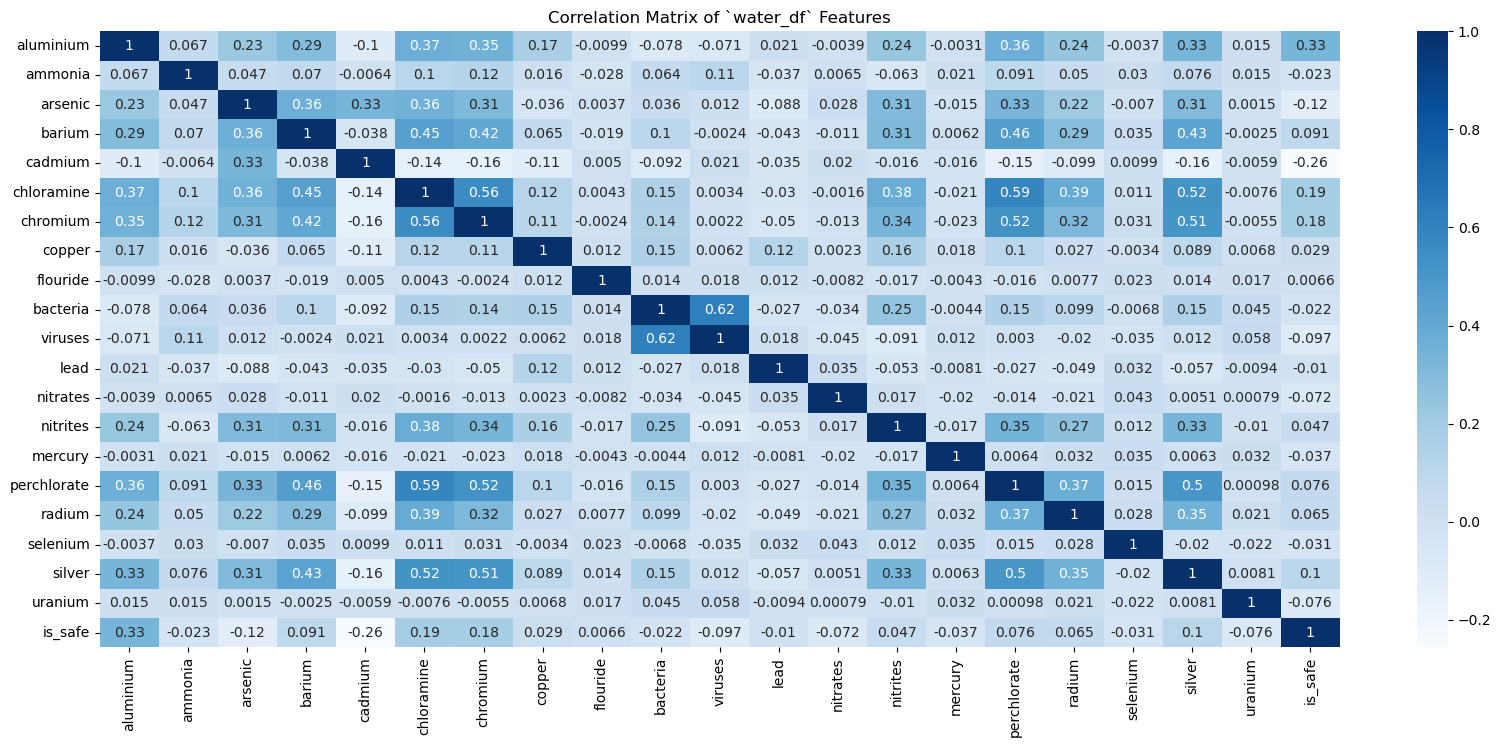

In [33]:
# YOUR CODE HERE

water_corr_matrix = water_df.corr()
plt.figure(figsize=(20, 8))
ax = sns.heatmap(water_corr_matrix, cmap='Blues', annot=True)
ax.set_title('Correlation Matrix of `water_df` Features')
plt.show()

- Create a pairplot including the columns "arsenic", "cadmium", "chromium", "copper", "bacteria", "viruses", "lead", "nitrates", "mercury"; and color by the class "is_safe" **1 points**

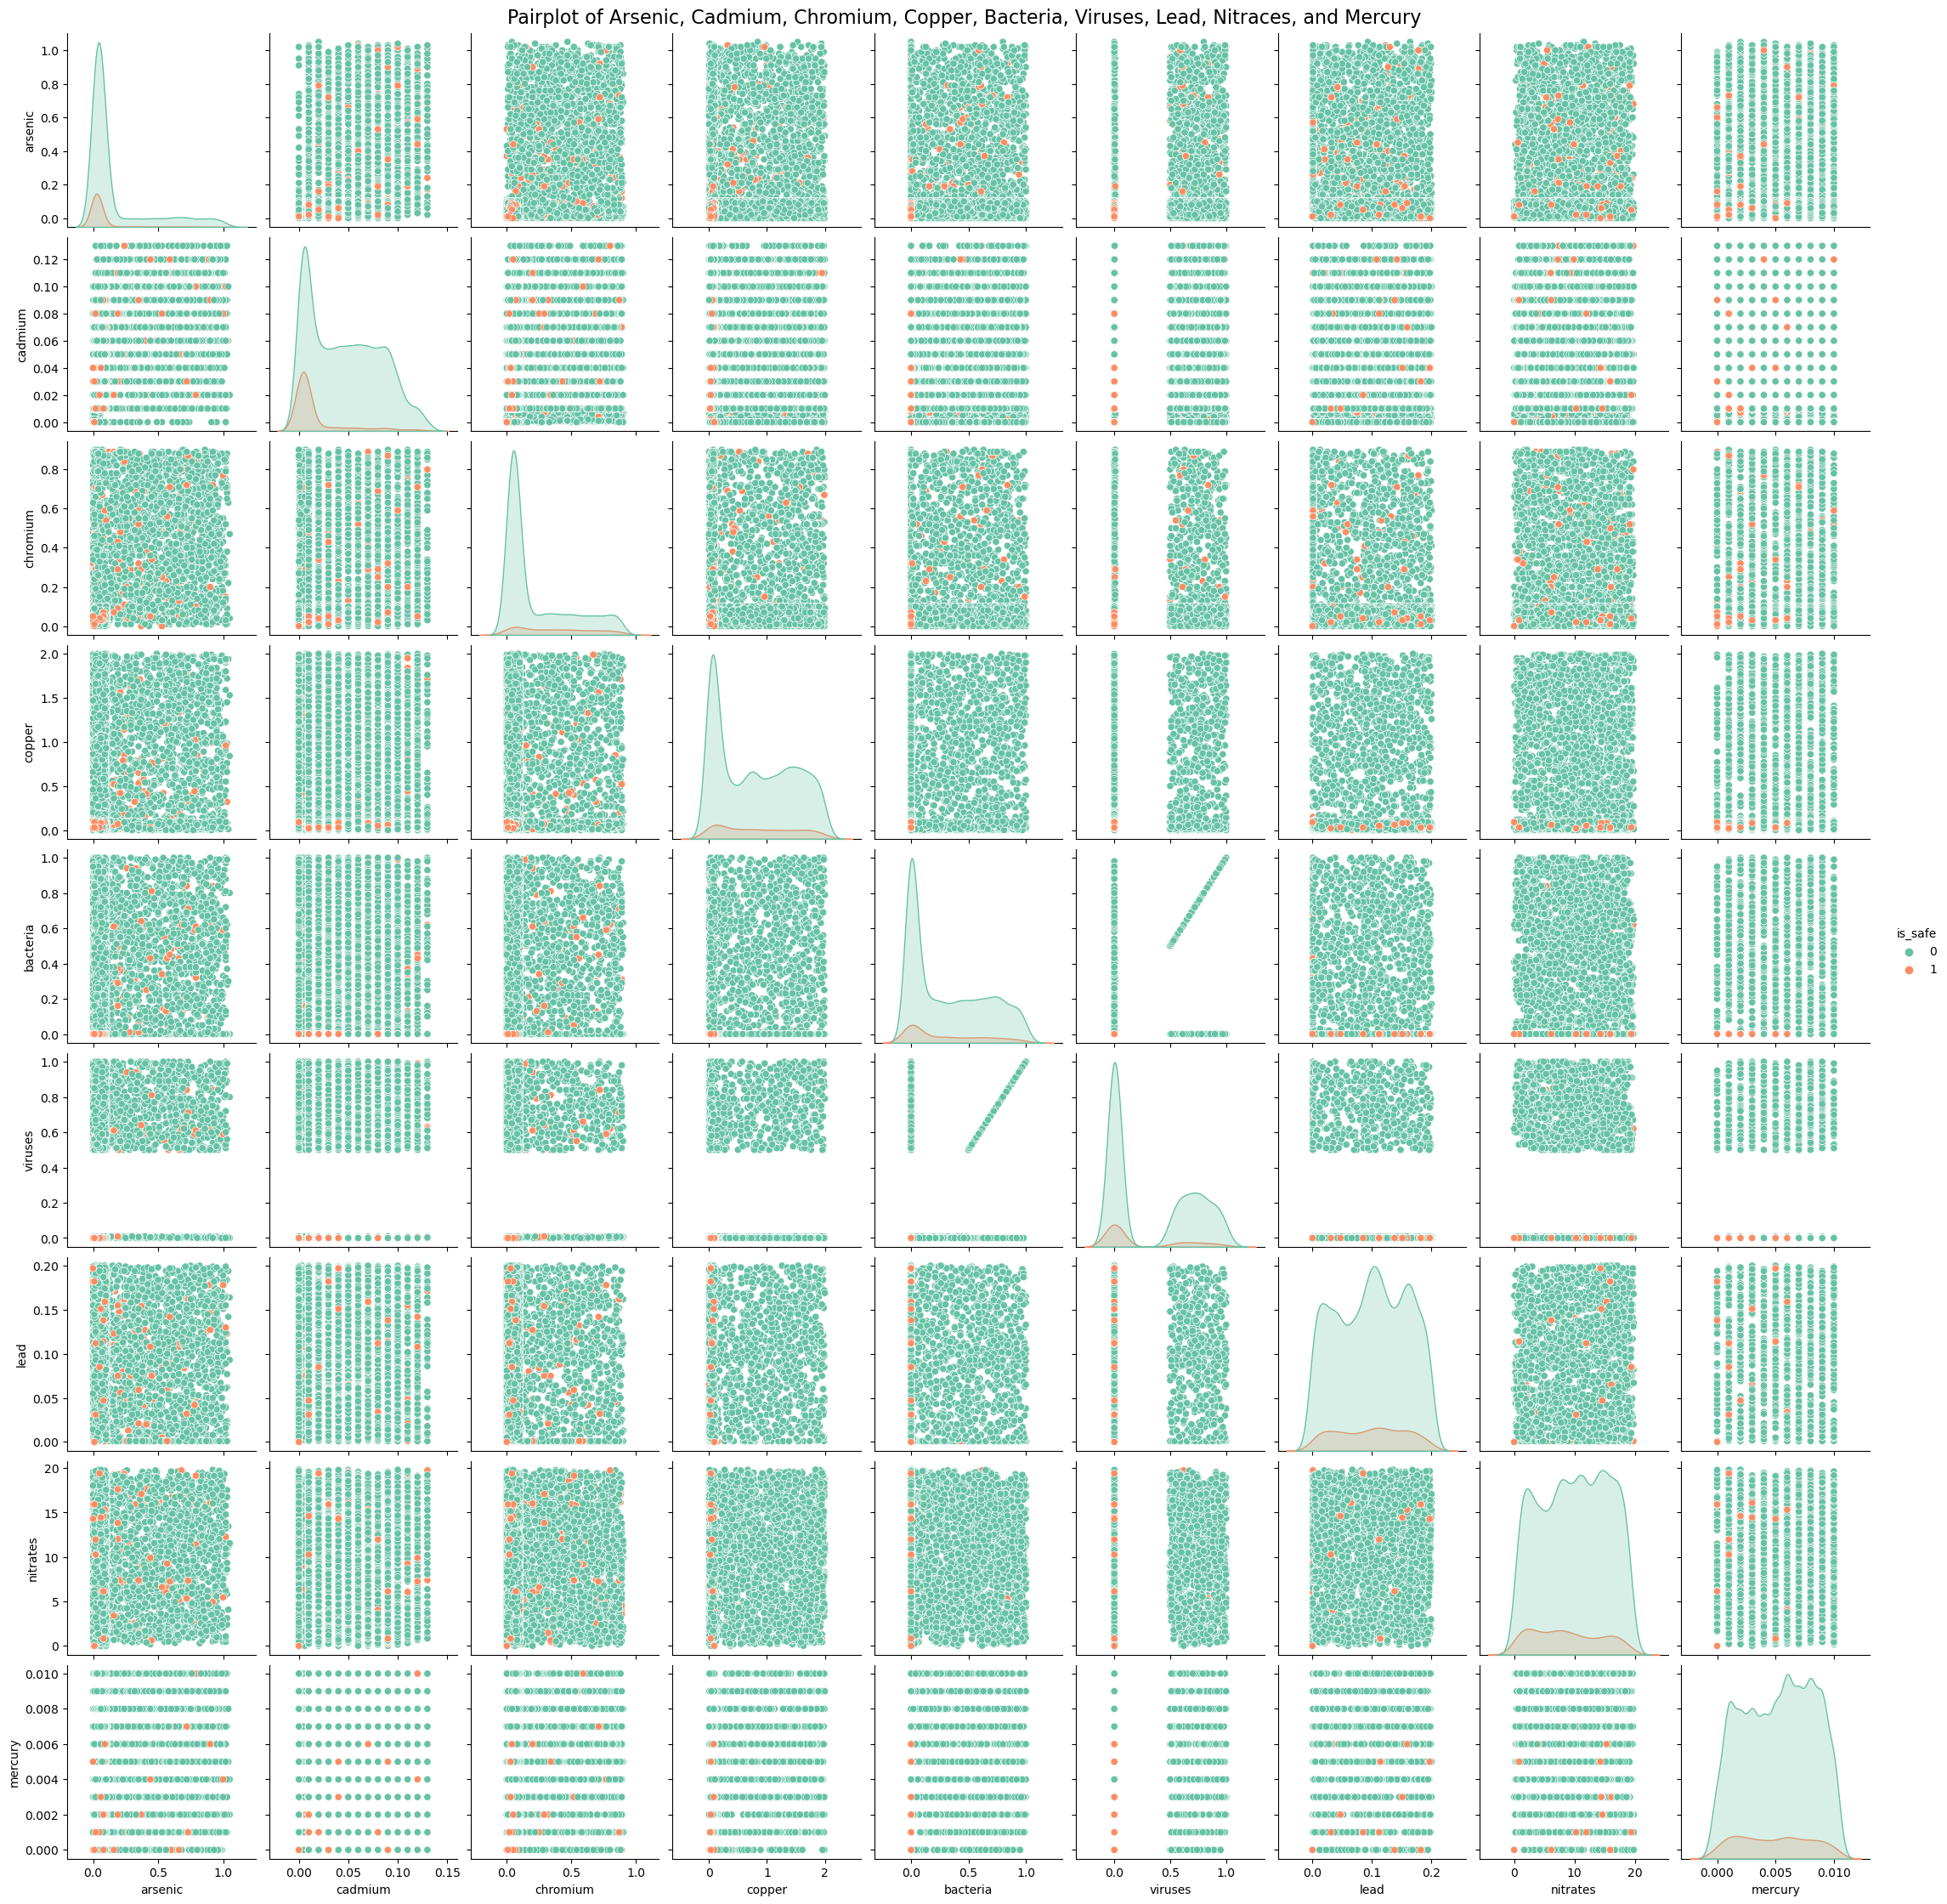

In [34]:
# YOUR CODE HERE

water_features = ['arsenic', 'cadmium', 'chromium', 'copper', 'bacteria', 
                  'viruses', 'lead', 'nitrates', 'mercury', 'is_safe']
water_sample = water_df[water_features]

sns.pairplot(water_sample, hue='is_safe', palette='Set2')

plt.suptitle('Pairplot of Arsenic, Cadmium, Chromium, Copper, Bacteria, Viruses, Lead, Nitraces, and Mercury', 
             y=1.0, fontsize=16)
plt.show()

- Feel free to pursue your exploration to better understand your dataset. Although not graded, this might help you better understanding the problem and answer the following questions.

In [35]:
# YOUR CODE HERE


### Question 7: Preprocessing

We will try to predict the class "is_safe", using all the other features.

- Extract your features and outcome. How many observations do we have of class 0 and of class 1? **1 point**

0    7084
1     912
Name: is_safe, dtype: int64

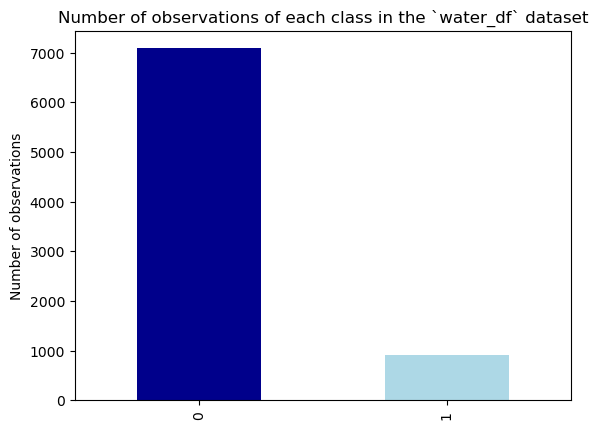

In [36]:
# YOUR CODE HERE

X = water_df.drop(columns='is_safe')
y = water_df['is_safe']

y.value_counts().plot.bar(color=['darkblue', 'lightblue'], grid=False)
plt.ylabel('Number of observations')
plt.title('Number of observations of each class in the `water_df` dataset');

y.value_counts()

<span style="color:blue">We have 7084 "not safe" (class 0) observations and only 912 "safe" (class 1) ones. The number of observations for each class influence the quality of our predictions. Here, the dataset is not balanced. Usually, to tackle this, one should assign weights, giving more importance during the training to the class that has fewer observations, thus, preventing it from being overwhelmed by the majority class.</span>

<span style="color:blue">However, in our situation the major is class is the one we want to predict. So, for us it is more important to correctly identify that the water is unsafe, than to correctly identify both of them.</span>

- Split between training and test set **1 point**

*Note*: Use as parameters for splitting: `test_size=0.2`, `random_state=39`, `shuffle=True`

In [37]:
# YOUR CODE HERE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39, shuffle=True, stratify=y)

- Rescale your features using `StandardScaler` **1 point**

In [38]:
# YOUR CODE HERE

std_scaler = StandardScaler()
std_scaler.fit(X_train)

X_train_std_scaled = std_scaler.transform(X_train)
X_test_std_scaled = std_scaler.transform(X_test)

### Question 8: Logistic Regression

- Build and train a logistic regression classifier, using as parameters `penalty='l2'`, `solver='lbfgs'`, `max_iter=1000` **1 point**

In [39]:
# YOUR CODE HERE

logi_reg = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
logi_reg.fit(X_train_std_scaled, y_train)

LogisticRegression(max_iter=1000)

- Compute the accuracy on the training and test set. Compare it to the default rate. **1 point** 

<span style="color:blue">Default rate (or base rate) refers to the accuracy of the classifier, which is equal to:</span>

<span style="color:blue">$$\text{Default rate} = \frac{\# \text{most frequent class}}{\# \text{total observations}}$$</span>

<span style="color:blue">Ideally, accuracy of our classifier should be better than the default rate. However, as it was stated before, our dataset is imbalanced (7084 vs. 912 observations), so, apparently, our default rate will be reasonably high.</span>

In [40]:
# YOUR CODE HERE

y_train_pred_logi_reg = logi_reg.predict(X_train_std_scaled)
y_test_pred_logi_reg = logi_reg.predict(X_test_std_scaled)

train_accuracy_logi_reg = round(accuracy_score(y_train, y_train_pred_logi_reg), 3)
test_accuracy_logi_reg = round(accuracy_score(y_test, y_test_pred_logi_reg), 3)

# Compute the default rate
not_safe = water_df.loc[water_df["is_safe"] == 0].shape[0]
safe = water_df.loc[water_df["is_safe"] == 1].shape[0]
default_rate = round(max(not_safe, safe)/(water_df["is_safe"].shape[0]), 3)

models_accuracy = [[train_accuracy_logi_reg], 
                   [test_accuracy_logi_reg],
                   [default_rate]]

models_comparison = pd.DataFrame(models_accuracy,
                                 index = ['Train accuracy', 'Test accuracy', 'Default rate'], 
                                 columns=['Logistic Regression'])
models_comparison

Logistic Regression
Train accuracy                0.907
Test accuracy                 0.912
Default rate                  0.886

<span style="color:blue">The training accuracy is slightly lower than the test accuracy. This can be a sign of the overfitting. However, the model's accuracy is higher than the default rate. In turn, it means that a model achieves more accuracy in comaprison with the simple prediction of the majority class for every instance.</span>

- Plot a heatmap of the confusion matrix. Class 1 is the positive class. How many false positive did we obtain? **1 point**

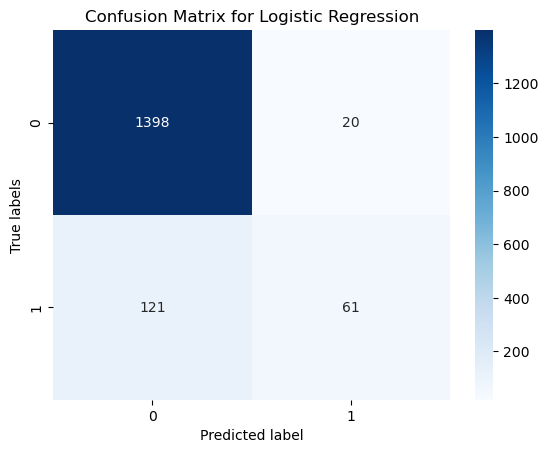

In [41]:
# YOUR CODE HERE

water_confusion_matrix_lin_reg = confusion_matrix(y_test, y_test_pred_logi_reg)

sns.heatmap(water_confusion_matrix_lin_reg, annot=True, cmap='Blues', fmt='.4g')
plt.xlabel('Predicted label')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Logistic Regression');

<span style="color:blue">**True Negative:** 1398</span>

<span style="color:blue">**True Positive:** 61</span>

<span style="color:blue">**False Negative:** 121</span>

<span style="color:blue">**False Positive:** 20</span>

<span style="color:blue">Out of all the water samples tested, the model correctly identified the majority of the samples that are not safe, resulting in 1144 TN. However, it struggled to correctly identify safe water samples, as evidenced by only 61 TP. Additionally, the model mistakenly classified 121 safe samples as unsafe (FN) and 20 unsafe samples as safe (FP).</span>

- What is the precision, recall, and f1 score of class 1? Interpret the result. **1 point**

In [42]:
# YOUR CODE HERE

precision_logi_reg = precision_score(y_test, y_test_pred_logi_reg, average = None)
recall_logi_reg = recall_score(y_test, y_test_pred_logi_reg, average = None)
f1_logi_reg = f1_score(y_test, y_test_pred_logi_reg, average = None)

evaluation_logi_reg = pd.DataFrame([precision_logi_reg, recall_logi_reg, f1_logi_reg],
                                   index = ['Precision', 'Recall', 'F1 score'], 
                                   columns=['not safe', 'safe'])

evaluation_logi_reg

not safe      safe
Precision  0.920342  0.753086
Recall     0.985896  0.335165
F1 score   0.951992  0.463878

<span style="color:blue">**Precision:** out of *all* the samples ('not safe' + 'safe') that the model predicted as class 'not safe', 92% were actually that class. In other words, the model is quite accurate at identifying not safe water. On the other hand, the model is correct only 75.3% times predicting class "safe".</span>

<span style="color:blue">**Recall:** out of all the *actual* samples that belong to class 'not safe', the model correctly identified 98.6% of them as class 'not safe', for class 'safe': 33.5%. This means that the model is relatively good at identifying bad-quality water but not that good at identifying class 'safe'.</span> 

<span style="color:blue">**F1 score** - for class 'not safe' 95.2%, indicating that the model's performance for this class is reasonably good. However, the F1 score for class 'safe' is only 46.4%, meaning that the model's performance for this class needs improvement.</span>

<span style="color:blue">Let's see if logistic regression classifier with cross-validation helps.</span>

- Build and train a logistic regression classifier with cross-validation, using 5 folds **1 point**

In [43]:
# YOUR CODE HERE

logi_reg_cv = LogisticRegressionCV(penalty='l2', solver='lbfgs', cv=5, max_iter=1000)
logi_reg_cv.fit(X_train_std_scaled, y_train)

LogisticRegressionCV(cv=5, max_iter=1000)

- Plot a heatmap of the confusion matrix. Compute the accuracy on the training and test set; as well as the precision, recall, and f1 score of class 1. How do your metrics compare to your model without cross-validation? **1 point**

*Note*: You can, but not have to, create a function to calculate your evaluation metrics since we will perform the same operation later on.

In [44]:
# YOUR CODE HERE

y_train_pred_logi_reg_cv = logi_reg_cv.predict(X_train_std_scaled)
y_test_pred_logi_reg_cv = logi_reg_cv.predict(X_test_std_scaled)

train_accuracy_logi_reg_cv = round(accuracy_score(y_train, y_train_pred_logi_reg_cv), 3)
test_accuracy_logi_reg_cv = round(accuracy_score(y_test, y_test_pred_logi_reg_cv), 3)

models_accuracy = [[train_accuracy_logi_reg, train_accuracy_logi_reg_cv], 
                   [test_accuracy_logi_reg, test_accuracy_logi_reg_cv],
                   [default_rate, default_rate]]

models_comparison = pd.DataFrame(models_accuracy,
                                 index = ['Train accuracy', 'Test accuracy', 'Default rate'], 
                                 columns=['Logistic Regression', 'Cross-Validation'])
models_comparison

Logistic Regression  Cross-Validation
Train accuracy                0.907             0.906
Test accuracy                 0.912             0.912
Default rate                  0.886             0.886

<span style="color:blue">In terms of model accuracy, this step didn't provide any improvements.</span>

In [45]:
precision_logi_reg_cv = precision_score(y_test, y_test_pred_logi_reg_cv, average = None)
recall_logi_reg_cv = recall_score(y_test, y_test_pred_logi_reg_cv, average = None)
f1_logi_reg_cv = f1_score(y_test, y_test_pred_logi_reg_cv, average = None)

evaluation_logi_reg_cv = pd.DataFrame([precision_logi_reg_cv, recall_logi_reg_cv, f1_logi_reg_cv],
                                      index = ['Precision', 'Recall', 'F1 score'], 
                                      columns=['not safe', 'safe'])

evaluation_logi_reg_cv

not safe      safe
Precision  0.920342  0.753086
Recall     0.985896  0.335165
F1 score   0.951992  0.463878

<span style="color:blue">In terms of precision, recall, and F1 score, there are also no improvements.</span>

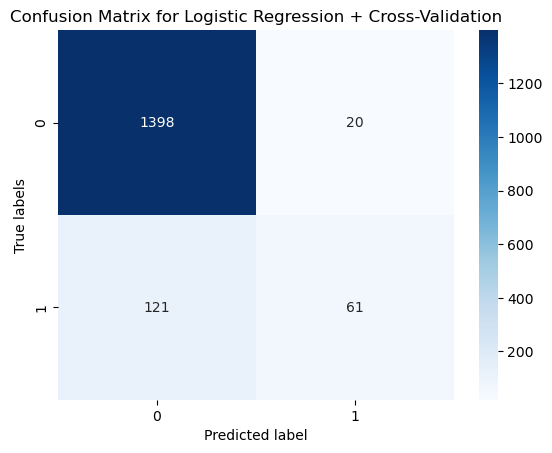

In [46]:
# YOUR CODE HERE

water_confusion_matrix_cv = confusion_matrix(y_test, y_test_pred_logi_reg_cv)

sns.heatmap(water_confusion_matrix_cv, annot=True, cmap='Blues', fmt='.4g')
plt.xlabel('Predicted label')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Logistic Regression + Cross-Validation');

<span style="color:blue">All the values remain the same.</span>

### Question 9: KNN classifier

- Build and train a KNN classifier with parameters `n_neighbors=7`, `p=2`, `weights='uniform'` **1 point**

In [47]:
water_sample = water_df[water_features]

X = water_sample.drop(columns='is_safe')
y = water_sample['is_safe']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39, shuffle=True, stratify=y)

std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

model_knn = KNeighborsClassifier(n_neighbors=7, p=2, weights='uniform')
model_knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=7)

- Plot a heatmap of the confusion matrix. Compute the accuracy on the training and test set; as well as the precision, recall, and f1 score of class 1. How do your metrics compare to your previous models? **1 point**

In [48]:
# YOUR CODE HERE

y_train_pred_knn = model_knn.predict(X_train_std)
y_test_pred_knn = model_knn.predict(X_test_std)

train_accuracy_knn = round(accuracy_score(y_train, y_train_pred_knn), 3)
test_accuracy_knn = round(accuracy_score(y_test, y_test_pred_knn), 3)

models_accuracy = [[train_accuracy_logi_reg, train_accuracy_logi_reg_cv, train_accuracy_knn], 
                   [test_accuracy_logi_reg, test_accuracy_logi_reg_cv, test_accuracy_knn],
                   [default_rate, default_rate, default_rate]]

models_comparison = pd.DataFrame(models_accuracy,
                                 index = ['Train accuracy', 'Test accuracy', 'Default rate'], 
                                 columns=['Logistic Regression', 'Cross-Validation', 'KNN Classifier'])
models_comparison

Logistic Regression  Cross-Validation  KNN Classifier
Train accuracy                0.907             0.906           0.899
Test accuracy                 0.912             0.912           0.876
Default rate                  0.886             0.886           0.886

<span style="color:blue">Well, this approach is worse since both (train and test) accuracies decreased. Moreover, now it is even more reasonable to guess the class of the instance by the majority rule since the default rate is higher than th accuracies now.</span>

In [49]:
precision_knn = precision_score(y_test, y_test_pred_knn, average = None)
recall_knn = recall_score(y_test, y_test_pred_knn, average = None)
f1_knn = f1_score(y_test, y_test_pred_knn, average = None)

evaluation_knn = pd.DataFrame([precision_knn, recall_knn, f1_knn],
                                      index = ['Precision', 'Recall', 'F1 score'], 
                                      columns=['not safe', 'safe'])

evaluation_knn

not safe      safe
Precision  0.895078  0.357143
Recall     0.974612  0.109890
F1 score   0.933153  0.168067

<span style="color:blue">Based on these metrics, I can make the same conclusion: both precisions dropped (not safe - by 2.5%, safe - 40%), both recalls dropped (not safe - by 1%, safe - by 23%), both F1s dropped (not safe - by 2%, safe - by 30%).</span>

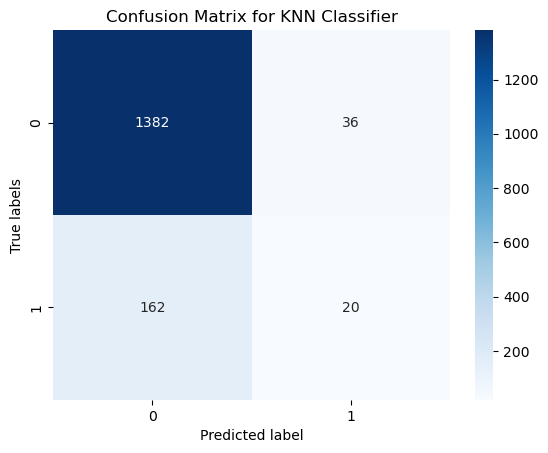

In [50]:
# YOUR CODE HERE

water_confusion_matrix_knn = confusion_matrix(y_test, y_test_pred_knn)

sns.heatmap(water_confusion_matrix_knn, annot=True, cmap='Blues', fmt='.4g')
plt.xlabel('Predicted label')
plt.ylabel('True labels')
plt.title('Confusion Matrix for KNN Classifier');

<span style="color:blue">**True Negative:** 1382 vs. 1398 (logi_reg)</span>

<span style="color:blue">**True Positive:** 20 vs. 61 (logi_reg)</span>

<span style="color:blue">**False Negative:** 162 vs. 121 (logi_reg)</span>

<span style="color:blue">**False Positive:** 36 vs. 20 (logi_reg)</span>

<span style="color:blue">Basically, the model became less accurate at identifying both, TN (ie unsafe water instances) ans TP (ie safe water instances). Now it has more mistakes since both FN and FP values increased.</span>

- Use `GridSearchCV` to explore different parameters for your model: `n_neighbors` between 1 and 11, `p` between 1 and 3, and `weights` either 'uniform' or 'distance' **1 point**

In [51]:
# YOUR CODE HERE

grid = {'n_neighbors':np.arange(0, 11),
        'p':np.arange(0, 4),
        'weights':['uniform','distance']}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=5)
knn_cv.fit(X_train_std, y_train)

print("Hyperparameters:", knn_cv.best_params_)
print(f"Train Score: {knn_cv.best_score_:.2f}")
print(f"Test Score: {knn_cv.score(X_test, y_test):.2f}")

Hyperparameters: {'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
Train Score: 0.89
Test Score: 0.89


/Users/mivelikikh/software/miniconda3/envs/dss/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mivelikikh/software/miniconda3/envs/dss/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mivelikikh/software/miniconda3/envs/dss/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 213, in fit
    self._validate_params()
  File "/Users/mivelikikh/software/miniconda3/envs/dss/lib/python3.9/site-pac

- For your "optimal" model, compute the accuracy on the training and test set; as well as the precision, recall, and f1 score of class 1. How do your metrics compare to your previous models? **1 point** 

In [52]:
# YOUR CODE HERE

optimal_model_knn = KNeighborsClassifier(n_neighbors=10, p=1, weights='uniform')
optimal_model_knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=10, p=1)

In [53]:
# YOUR CODE HERE

y_train_pred_knn_optimal = optimal_model_knn.predict(X_train_std)
y_test_pred_knn_optimal = optimal_model_knn.predict(X_test_std)

train_accuracy_knn_optimal = round(accuracy_score(y_train, y_train_pred_knn_optimal), 3)
test_accuracy_knn_optimal = round(accuracy_score(y_test, y_test_pred_knn_optimal), 3)

models_accuracy = [[train_accuracy_logi_reg, train_accuracy_logi_reg_cv, train_accuracy_knn, train_accuracy_knn_optimal], 
                   [test_accuracy_logi_reg, test_accuracy_logi_reg_cv, test_accuracy_knn, test_accuracy_knn_optimal],
                   [default_rate, default_rate, default_rate, default_rate]]

models_comparison = pd.DataFrame(models_accuracy,
                                 index = ['Train accuracy', 'Test accuracy', 'Default rate'], 
                                 columns=['Logistic Regression', 'Cross-Validation', 'KNN Classifier', 'Optimal KNN Classifier'])
models_comparison

Logistic Regression  Cross-Validation  KNN Classifier  \
Train accuracy                0.907             0.906           0.899   
Test accuracy                 0.912             0.912           0.876   
Default rate                  0.886             0.886           0.886   

                Optimal KNN Classifier  
Train accuracy                   0.893  
Test accuracy                    0.887  
Default rate                     0.886

<span style="color:blue">Compared to the previous KNN set-up, this approach is better but it is still not that good is a simple Logistic Regression.</span>

In [54]:
precision_knn_optimal = precision_score(y_test, y_test_pred_knn_optimal, average = None)
recall_knn_optimal = recall_score(y_test, y_test_pred_knn_optimal, average = None)
f1_knn_optimal = f1_score(y_test, y_test_pred_knn_optimal, average = None)

evaluation_knn_optimal = pd.DataFrame([precision_knn_optimal, recall_knn_optimal, f1_knn_optimal],
                                      index = ['Precision', 'Recall', 'F1 score'], 
                                      columns=['not safe', 'safe'])

evaluation_knn_optimal

not safe      safe
Precision  0.894200  0.516129
Recall     0.989422  0.087912
F1 score   0.939404  0.150235

<span style="color:blue">Compared to the previous KNN approach, these metrics are a bit higher -> better.</span>

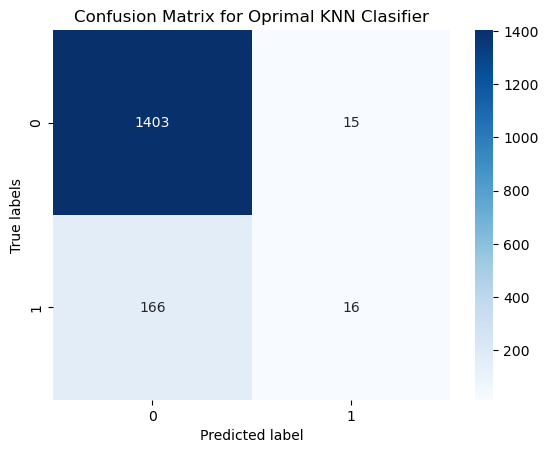

In [55]:
water_confusion_matrix_optimal = confusion_matrix(y_test, y_test_pred_knn_optimal)

sns.heatmap(water_confusion_matrix_optimal, annot=True, cmap='Blues', fmt='.4g')
plt.xlabel('Predicted label')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Oprimal KNN Clasifier');

<span style="color:blue">**True Negative:** 1403 vs. 1382 (knn) vs. 1398 (logi_reg)</span>

<span style="color:blue">**True Positive:** 16 vs. 20 (knn) vs. 61 (logi_reg)</span>

<span style="color:blue">**False Negative:** 166 vs. 162 (knn) vs. 121 (logi_reg)</span>

<span style="color:blue">**False Positive:** 15 vs. 36 (knn) vs. 20 (logi_reg)</span>

<span style="color:blue">It seems like the model improves it's abilities to detect unsafe water (because the number of TN increased) but at the same time loses it's abilities to detect safe ones.</span>

### Question 10: Decision Trees

- Build and train a Decision Tree with parameters `criterion = 'gini'`, `max_depth = 3` **1 point**

In [56]:
# YOUR CODE HERE

model_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
model_tree.fit(X_train_std, y_train)

DecisionTreeClassifier(max_depth=3)

- Plot a heatmap of the confusion matrix. Compute the accuracy on the training and test set; as well as the precision, recall, and f1 score of class 1. How do your metrics compare to your previous models? **1 point**

In [57]:
# YOUR CODE HERE

y_train_pred_tree = model_tree.predict(X_train_std)
y_test_pred_tree = model_knn.predict(X_test_std)

train_accuracy_tree = round(accuracy_score(y_train, y_train_pred_tree), 3)
test_accuracy_tree = round(accuracy_score(y_test, y_test_pred_tree), 3)

models_accuracy = [[train_accuracy_logi_reg, train_accuracy_logi_reg_cv, train_accuracy_knn, train_accuracy_knn_optimal, train_accuracy_tree], 
                   [test_accuracy_logi_reg, test_accuracy_logi_reg_cv, test_accuracy_knn, test_accuracy_knn_optimal, test_accuracy_tree],
                   [default_rate, default_rate, default_rate, default_rate, default_rate]]

models_comparison = pd.DataFrame(models_accuracy,
                                 index = ['Train accuracy', 'Test accuracy', 'Default rate'], 
                                 columns=['Logistic Regression', 'Cross-Validation', 'KNN Classifier', 'Optimal KNN Classifier', 'Decision Tree'])
models_comparison

Logistic Regression  Cross-Validation  KNN Classifier  \
Train accuracy                0.907             0.906           0.899   
Test accuracy                 0.912             0.912           0.876   
Default rate                  0.886             0.886           0.886   

                Optimal KNN Classifier  Decision Tree  
Train accuracy                   0.893          0.896  
Test accuracy                    0.887          0.876  
Default rate                     0.886          0.886

<span style="color:blue">The model might be underfitting since the test accuracy is notably lower than the train accuracy. Overall, this model doesn't provide the best classification approach.</span>

In [58]:
precision_tree = precision_score(y_test, y_test_pred_tree, average = None)
recall_tree = recall_score(y_test, y_test_pred_tree, average = None)
f1_tree = f1_score(y_test, y_test_pred_tree, average = None)

evaluation_tree = pd.DataFrame([precision_tree, recall_tree, f1_tree],
                                      index = ['Precision', 'Recall', 'F1 score'], 
                                      columns=['not safe', 'safe'])

evaluation_tree

not safe      safe
Precision  0.895078  0.357143
Recall     0.974612  0.109890
F1 score   0.933153  0.168067

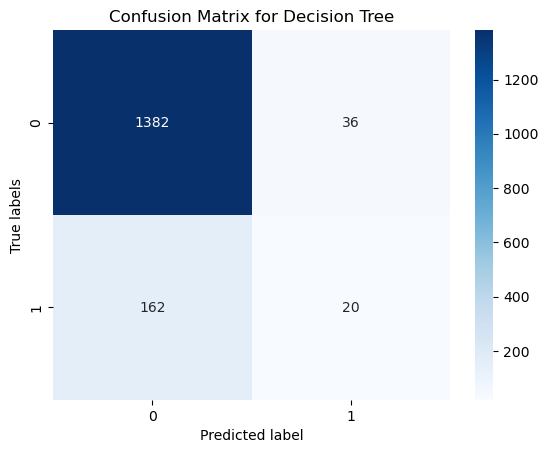

In [59]:
water_confusion_matrix_tree = confusion_matrix(y_test, y_test_pred_tree)

sns.heatmap(water_confusion_matrix_tree, annot=True, cmap='Blues', fmt='.4g')
plt.xlabel('Predicted label')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Decision Tree');

<span style="color:blue">**True Negative:** 1382 vs. 1403 (knn_optimal) vs. 1382 (knn) vs. 1398 (logi_reg)</span>

<span style="color:blue">**True Positive:** 20 vs. 16 (knn_optimal) vs. 20 (knn) vs. 61 (logi_reg)</span>

<span style="color:blue">**False Negative:** 162 vs. 166 (knn_optimal) vs. 162 (knn) vs. 121 (logi_reg)</span>

<span style="color:blue">**False Positive:** 36 vs. 15 (knn_optimal) vs. 36 (knn) vs. 20 (logi_reg)</span>

<span style="color:blue">Basically, these values suggest that the came back to the KNN approach (the values are identical).</span>

- Visualize your Decision Tree **1 point**

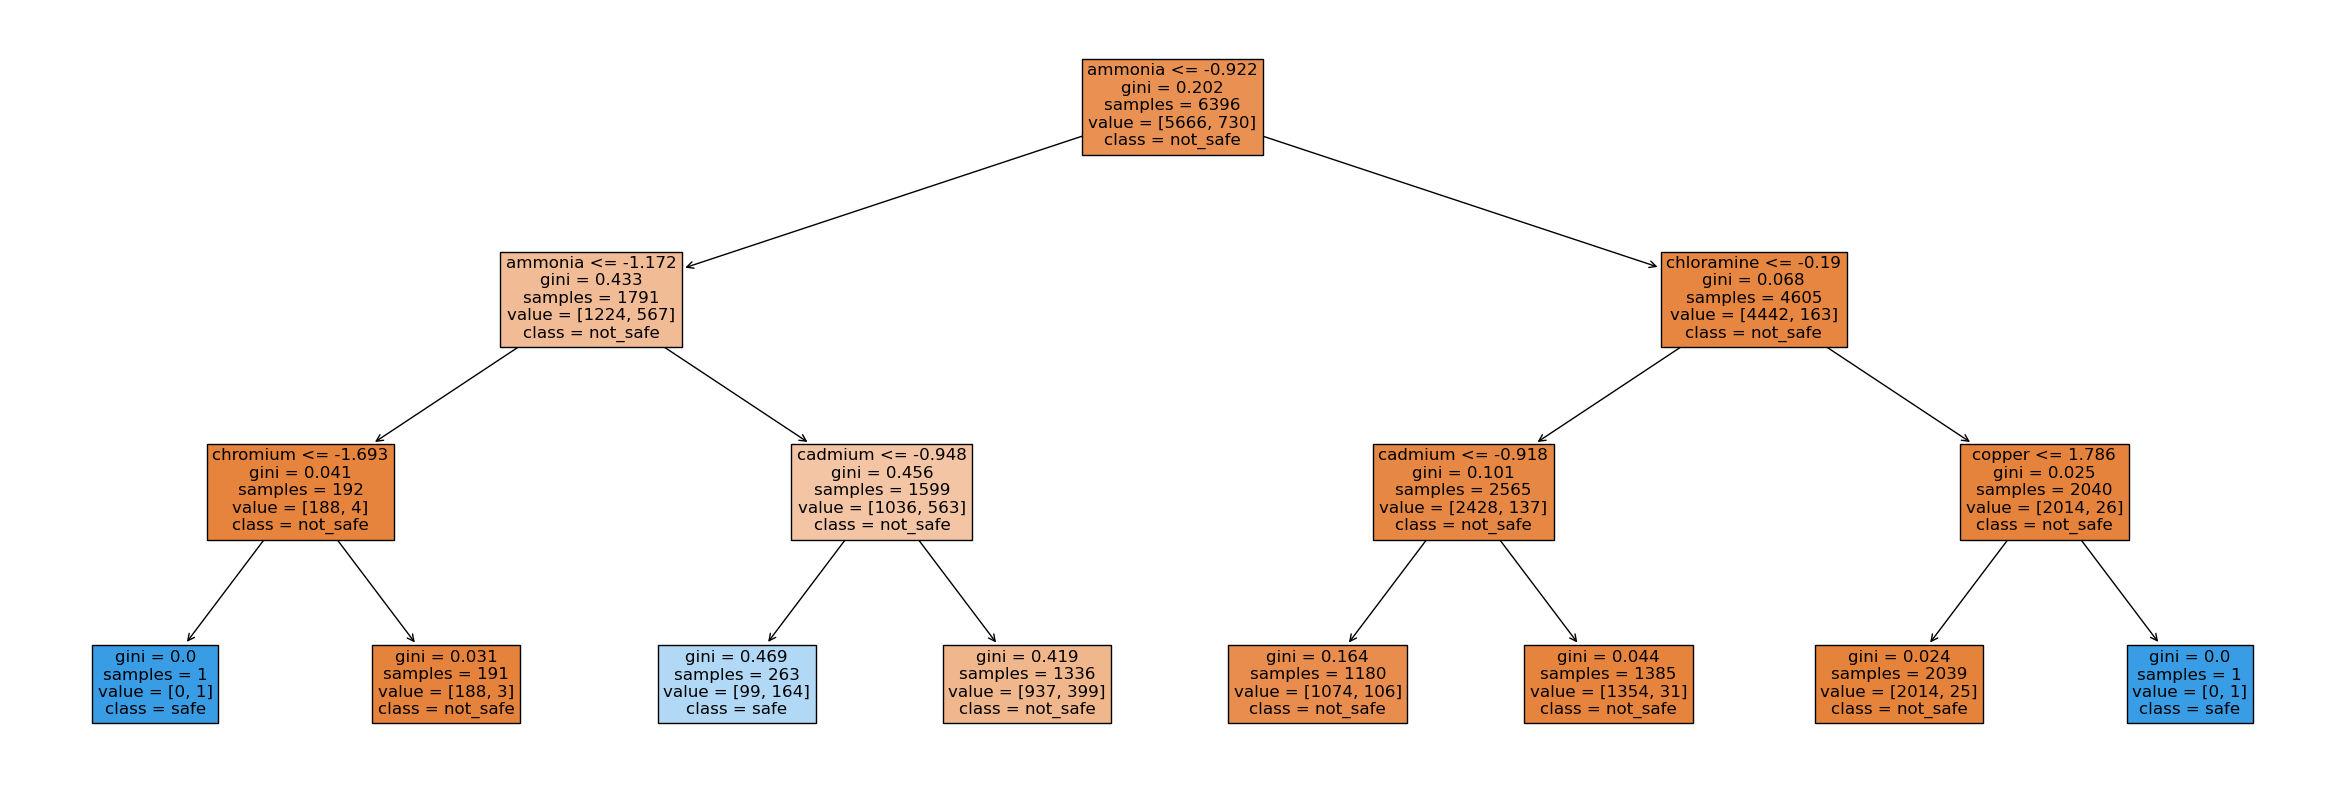

In [60]:
# YOUR CODE HERE

plt.figure(figsize=(30,10))
plot_tree(model_tree, filled=True, feature_names=('aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 
                                                  'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 
                                                  'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 
                                                  'perchlorate', 'radium', 'selenium', 'silver', 'uranium'),
          fontsize=12, class_names=['not_safe', 'safe'])
plt.show()

- Use `GridSearchCV` to explore different parameters for your model: `criterion` either 'gini' or 'entropy' and `max_depth` between 1 and 7 **1 point**

In [61]:
# YOUR CODE HERE

grid_tree = {'criterion':['gini','entropy'],
             'max_depth':np.arange(0,7)}

dec_tree = DecisionTreeClassifier()
dec_tree_cv = GridSearchCV(dec_tree, grid_tree, cv=5)
dec_tree_cv.fit(X_train_std, y_train)

print("Hyperparameters:", dec_tree_cv.best_params_)
print("Best model:", dec_tree_cv.best_estimator_)
print(f"Train Score: {dec_tree_cv.best_score_:.2f}")
print(f"Test Score: {dec_tree_cv.score(X_test, y_test):.2f}")

Hyperparameters: {'criterion': 'entropy', 'max_depth': 3}
Best model: DecisionTreeClassifier(criterion='entropy', max_depth=3)
Train Score: 0.90
Test Score: 0.89


/Users/mivelikikh/software/miniconda3/envs/dss/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mivelikikh/software/miniconda3/envs/dss/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mivelikikh/software/miniconda3/envs/dss/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/Users/mivelikikh/software/miniconda3/envs/dss/lib/python3.9/site-packages/sklearn/tree/_class

- For your "optimal" model, compute the accuracy on the training and test set; as well as the precision, recall, and f1 score of class 1. How do your metrics compare to your previous models? **1 point** 

In [62]:
# YOUR CODE HERE

optimal_model_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
optimal_model_tree.fit(X_train_std, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [63]:
# YOUR CODE HERE

y_train_pred_tree_optimal = optimal_model_tree.predict(X_train_std)
y_test_pred_tree_optimal = optimal_model_tree.predict(X_test_std)

train_accuracy_tree_optimal = round(accuracy_score(y_train, y_train_pred_tree_optimal), 3)
test_accuracy_tree_optimal = round(accuracy_score(y_test, y_test_pred_tree_optimal), 3)

models_accuracy = [[train_accuracy_logi_reg, train_accuracy_logi_reg_cv, train_accuracy_knn, train_accuracy_knn_optimal, train_accuracy_tree, train_accuracy_tree_optimal], 
                   [test_accuracy_logi_reg, test_accuracy_logi_reg_cv, test_accuracy_knn, test_accuracy_knn_optimal, test_accuracy_tree, test_accuracy_tree_optimal],
                   [default_rate, default_rate, default_rate, default_rate, default_rate, default_rate]]

models_comparison = pd.DataFrame(models_accuracy,
                                 index = ['Train accuracy', 'Test accuracy', 'Default rate'], 
                                 columns=['Logistic Regression', 'Cross-Validation', 'KNN Classifier', 'Optimal KNN Classifier', 'Decision Tree', 'Optimal Decision Tree'])
models_comparison

Logistic Regression  Cross-Validation  KNN Classifier  \
Train accuracy                0.907             0.906           0.899   
Test accuracy                 0.912             0.912           0.876   
Default rate                  0.886             0.886           0.886   

                Optimal KNN Classifier  Decision Tree  Optimal Decision Tree  
Train accuracy                   0.893          0.896                  0.896  
Test accuracy                    0.887          0.876                  0.900  
Default rate                     0.886          0.886                  0.886

In [64]:
precision_tree_optimal = precision_score(y_test, y_test_pred_tree_optimal, average = None)
recall_tree_optimal = recall_score(y_test, y_test_pred_tree_optimal, average = None)
f1_tree_optimal = f1_score(y_test, y_test_pred_tree_optimal, average = None)

evaluation_tree_optimal = pd.DataFrame([precision_tree_optimal, recall_tree_optimal, f1_tree_optimal],
                                        index = ['Precision', 'Recall', 'F1 score'], 
                                        columns=['not safe', 'safe'])

evaluation_tree_optimal

not safe      safe
Precision  0.908973  0.677419
Recall     0.985896  0.230769
F1 score   0.945873  0.344262

<span style="color:blue">Compared to the previous Tree, the metrics are better now. But still, it seems like the very first model was the best one.</span>

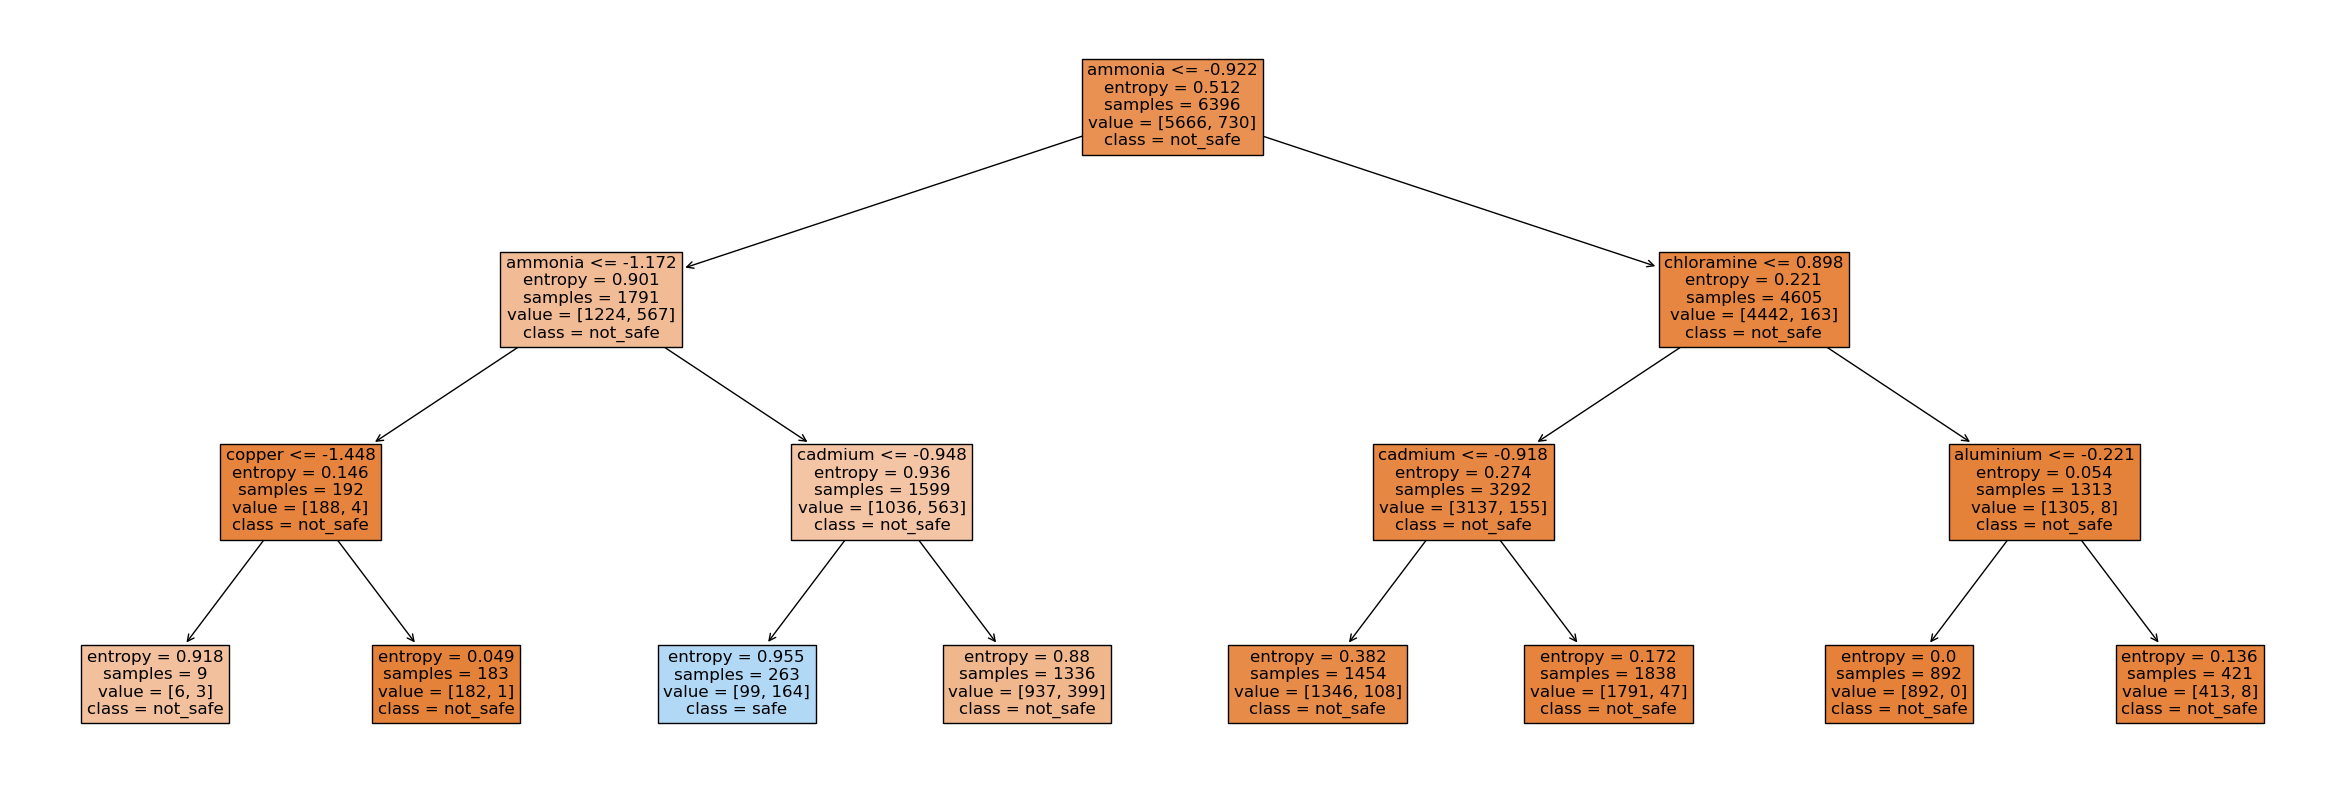

In [65]:
plt.figure(figsize=(30,10))
plot_tree(optimal_model_tree, filled=True, feature_names=('aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 
                                                  'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 
                                                  'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 
                                                  'perchlorate', 'radium', 'selenium', 'silver', 'uranium'),
          fontsize=12, class_names=['not_safe', 'safe'])
plt.show()

Congrats, you are done with the assignment!